In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



plt.rc('font',family='Malgun Gothic')

plt.rc('axes',unicode_minus=False)

In [2]:
bike_file_path = "C:/Users/eagls/bike_data/bike.json"
bike_data = pd.read_json(bike_file_path)

In [3]:
bike_df=pd.DataFrame(bike_data['useStatus']['row'])

In [4]:
bike_df.isnull().sum()

STA_LOC        0
RENT_NM        0
STAT_DATA      0
RENT_CNT       0
RTN_CNT        0
START_INDEX    0
END_INDEX      0
dtype: int64

In [5]:
bike_df.duplicated().sum()

0

In [6]:
weather_file_path = "C:/Users/eagls/weather_data/json_cycle_finale.json"
weather_data = pd.read_json(weather_file_path)


In [7]:
weather_df=pd.DataFrame(weather_data["response"]["body"]["items"]["item"])

In [8]:
weather_df.duplicated().sum()

2

In [9]:
weather_df.drop_duplicates(inplace=True)


In [10]:
merged_df = pd.merge(bike_df, weather_df, left_on='STAT_DATA', right_on='tm')

In [11]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'START_INDEX',
       'END_INDEX', 'stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt',
       'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn',
       'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd',
       'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws',
       'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa',
       'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur'],
      dtype='object')

In [12]:
merged_df.isnull().sum()

STA_LOC      0
RENT_NM      0
STAT_DATA    0
RENT_CNT     0
RTN_CNT      0
            ..
sumLrgEv     0
sumSmlEv     0
n99Rn        0
iscs         0
sumFogDur    0
Length: 69, dtype: int64

In [13]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'START_INDEX',
       'END_INDEX', 'stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt',
       'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn',
       'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd',
       'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws',
       'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa',
       'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr',
       'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt',
       'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs',
       'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te',
       'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv',
       'n99Rn', 'iscs', 'sumFogDur'],
      dtype='object')

In [14]:
merged_df.drop(columns='stnId', inplace=True) 

In [15]:
merged_df.drop(columns='tm', inplace=True)

In [16]:
merged_df.drop(columns='START_INDEX', inplace=True)

In [17]:
merged_df.drop(columns='END_INDEX', inplace=True)

In [18]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,...,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,...,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 65 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   STA_LOC         1093662 non-null  object
 1   RENT_NM         1093662 non-null  object
 2   STAT_DATA       1093662 non-null  object
 3   RENT_CNT        1093662 non-null  object
 4   RTN_CNT         1093662 non-null  object
 5   stnNm           1093662 non-null  object
 6   avgTa           1093662 non-null  object
 7   minTa           1093662 non-null  object
 8   minTaHrmt       1093662 non-null  object
 9   maxTa           1093662 non-null  object
 10  maxTaHrmt       1093662 non-null  object
 11  mi10MaxRn       1093662 non-null  object
 12  mi10MaxRnHrmt   1093662 non-null  object
 13  hr1MaxRn        1093662 non-null  object
 14  hr1MaxRnHrmt    1093662 non-null  object
 15  sumRnDur        1093662 non-null  object
 16  sumRn           1093662 non-null  object
 17  maxInsWs

In [20]:
merged_df.describe()

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
count,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,...,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662,1093662
unique,25,2139,1095,655,657,1,370,376,394,363,...,268,234,211,135,59,70,97,165,698,9
top,송파구,659. 제기동역 1번출구,2020-01-01,7,3,서울,24.3,14.8,0001,27.5,...,1.2,6.9,23.6,20.1,13.4,1.5,2.1,,,
freq,92359,1095,999,25195,27550,1093662,12987,7992,27972,8991,...,33966,13986,17982,27972,78921,47952,35964,636363,393606,1085670


In [21]:
merged_df['RENT_CNT'] = merged_df['RENT_CNT'].astype(int)

In [22]:
merged_df.groupby(['RENT_NM'])['RENT_CNT'].sum().sort_values(ascending=False)

RENT_NM
2715.마곡나루역 2번 출구           288357
2701. 마곡나루역 5번출구 뒤편        229831
2177. 신대방역 2번 출구           226993
1153. 발산역 1번, 9번 인근 대여소    225396
3533. 건대입구역 사거리(롯데백화점)     202757
                            ...  
1694.월계세양청마루아파트 후문              0
1642. 서울여대 남문                   0
4040. 공릉로 26길                   0
1628. 노일초등학교 앞                  0
1946. 구로역 광장                    0
Name: RENT_CNT, Length: 2139, dtype: int32

In [23]:
location_rent=merged_df.groupby(['STA_LOC'])['RENT_CNT'].sum().sort_values(ascending=False).reset_index()

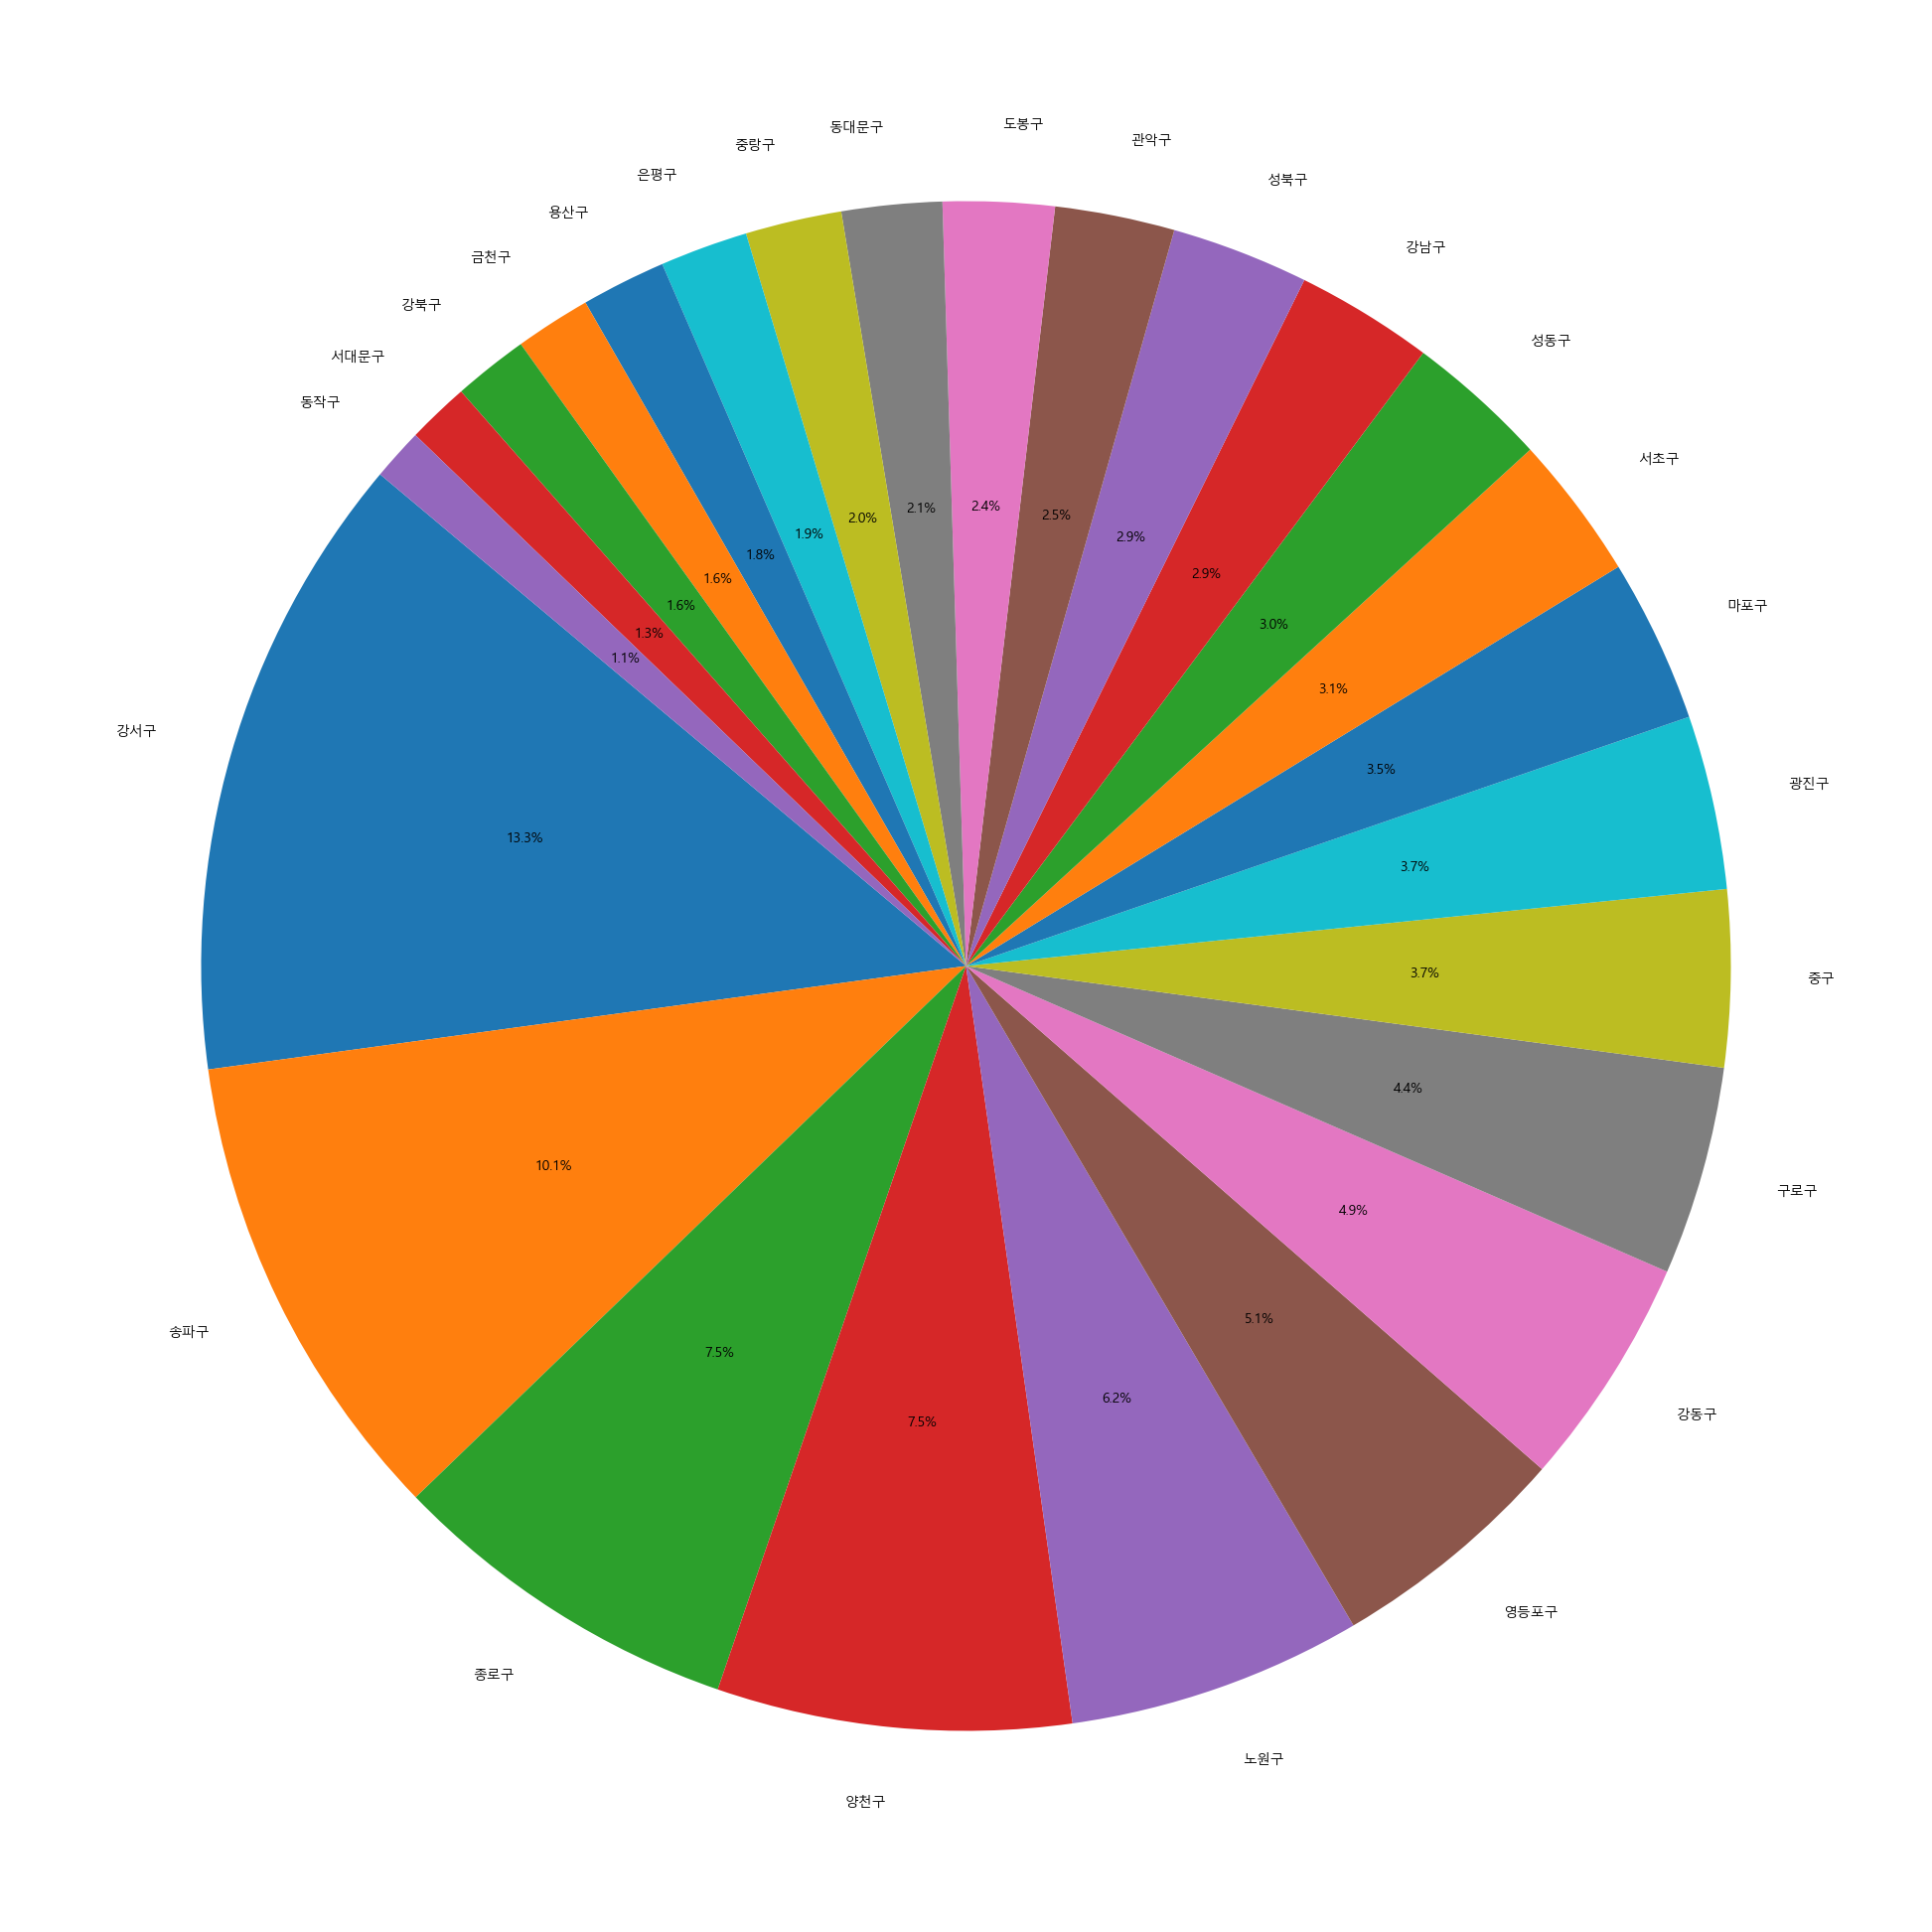

In [24]:
plt.figure(figsize=(25, 25))
plt.pie(location_rent['RENT_CNT'], labels=location_rent['STA_LOC'], autopct='%1.1f%%', startangle=140)
plt.show()

### 자전거 이용 위치 비율

In [25]:
merged_df['Year'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[0]))
merged_df['Month'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[1]))
merged_df['Day'] = merged_df['STAT_DATA'].map(lambda x:int(x.split("-")[2]))

In [26]:
merged_df['sumRnDur'] = merged_df['sumRnDur'].apply(lambda x:0 if x == '' else float(x))
merged_df['sumRn'] = merged_df['sumRn'].apply(lambda x:0 if x == '' else float(x))

In [27]:

merged_df.loc[(merged_df['Month'] ==3) | (merged_df['Month'] ==4) |(merged_df['Month'] ==5), 'Season'] = 1
merged_df.loc[(merged_df['Month'] ==6) | (merged_df['Month'] ==7) |(merged_df['Month'] ==8), 'Season'] = 2
merged_df.loc[(merged_df['Month'] ==9) | (merged_df['Month'] ==10) |(merged_df['Month'] ==11), 'Season'] = 3
merged_df.loc[(merged_df['Month'] ==12) | (merged_df['Month'] ==1) |(merged_df['Month'] ==2), 'Season'] = 4

In [28]:
merged_df['STAT_DATA']=pd.to_datetime(merged_df['STAT_DATA'])

In [29]:
merged_df['Day_Of_Week'] = merged_df['STAT_DATA'].dt.weekday

In [30]:
merged_df.duplicated().sum()

0

In [31]:
season_rent = merged_df.groupby('Season')['RENT_CNT'].sum().reset_index()

In [32]:
season_rent

,Season,RENT_CNT
0,1.0,11676514
1,2.0,12315840
2,3.0,12803063
3,4.0,5119991


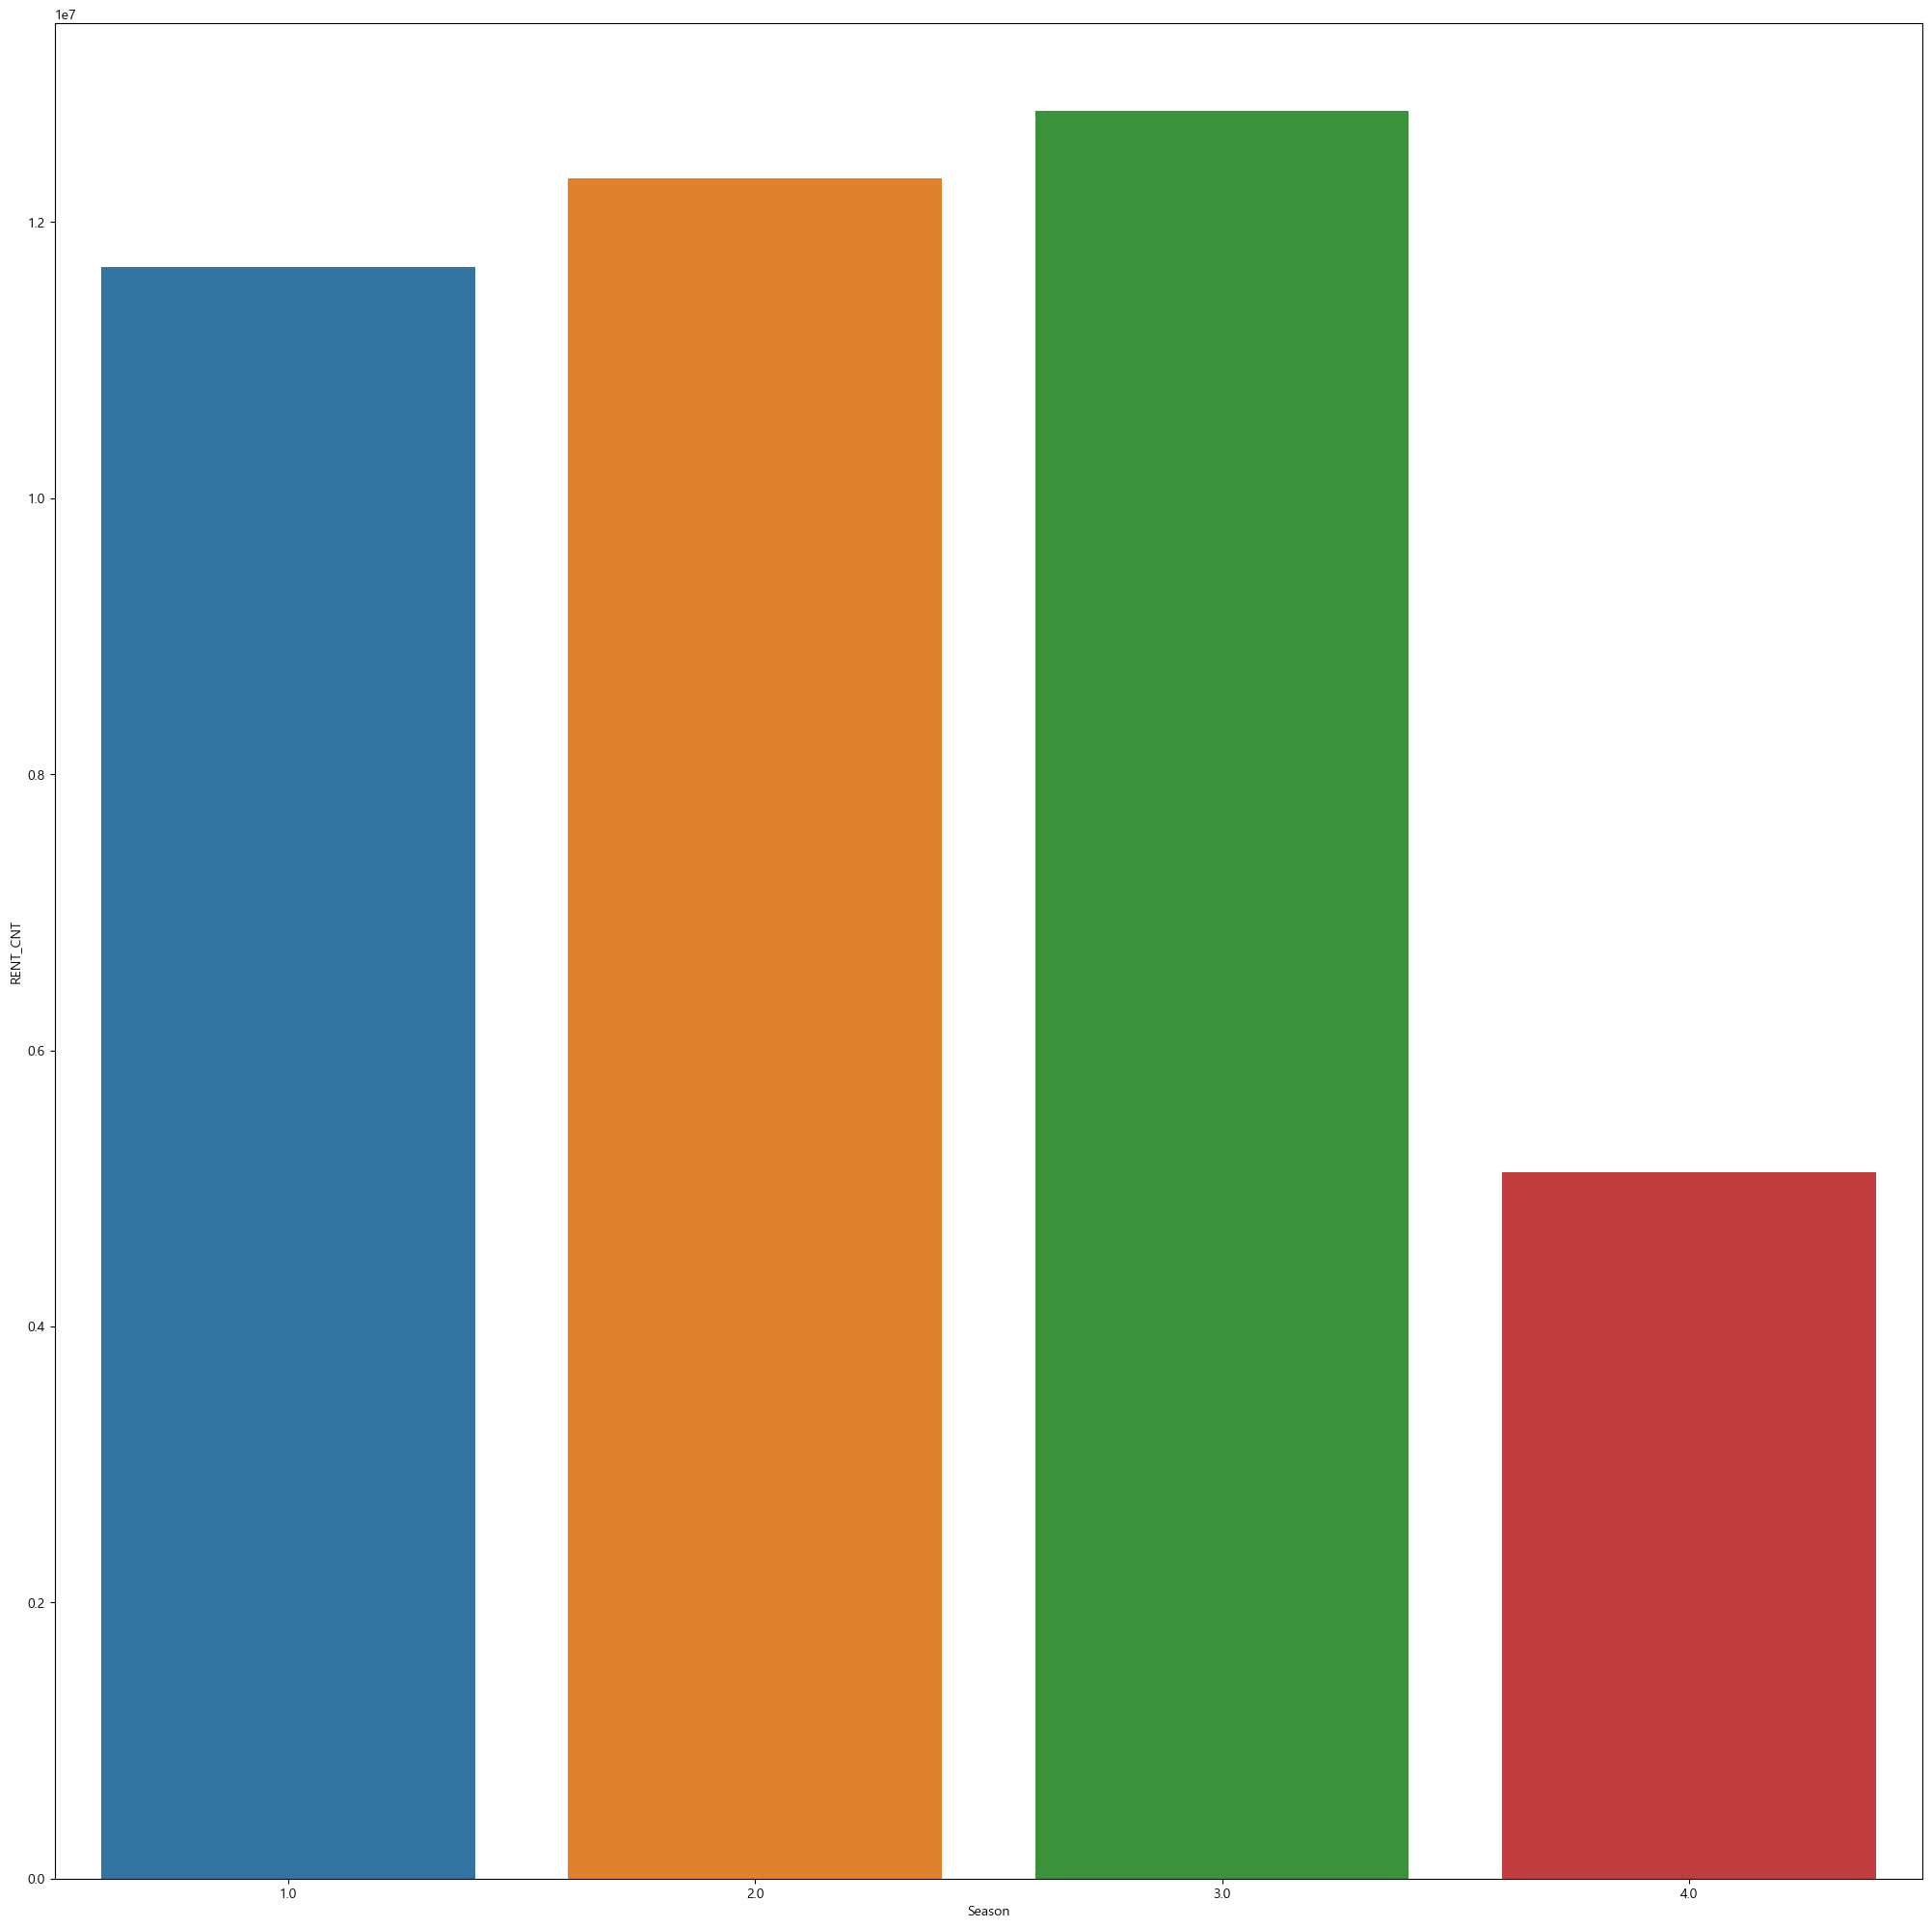

In [33]:
plt.figure(figsize=(25, 25))
sns.barplot(data=season_rent, x='Season', y='RENT_CNT')
plt.show()

### 계절별 렌트 횟수
- 날씨가 좋은 봄 여름 가을에 이용이 많고 겨울에 적음
- 의외로 봄보다 여름이 이용자가 더 많음

In [34]:
merged_df['avgTca'].unique()

array(['8.9', '7.9', '0.0', '2.1', '3.9', '9.8', '10.0', '9.6', '1.6',
       '3.1', '3.6', '1.4', '1.0', '0.1', '5.0', '4.8', '2.3', '2.9',
       '7.8', '3.4', '3.0', '7.4', '5.8', '9.5', '7.3', '6.6', '4.0',
       '6.1', '1.5', '0.9', '2.5', '2.8', '1.1', '9.9', '9.1', '6.5',
       '6.0', '9.3', '5.9', '7.0', '7.5', '5.3', '2.6', '8.1', '5.1',
       '5.4', '0.3', '0.4', '6.9', '5.5', '3.5', '1.3', '0.8', '1.9',
       '4.1', '1.8', '3.3', '9.0', '6.8', '0.6', '8.3', '7.1', '8.5',
       '7.6', '8.6', '8.4', '3.8', '4.4', '6.3', '4.5', '8.0', '6.4',
       '8.8', '9.4', '4.6', '4.9', '0.5', '2.4', '2.0', '5.6', '4.3'],
      dtype=object)

In [35]:
merged_df['avgTca'] = merged_df['avgTca'].astype(float)

In [36]:
merged_df.loc[merged_df['avgTca'] <=3, 'Avg_Cloud_level'] = 0
merged_df.loc[(merged_df['avgTca'] >3)&(merged_df['avgTca'] <=6), 'Avg_Cloud_level'] =1
merged_df.loc[(merged_df['avgTca'] >6)&(merged_df['avgTca'] <=10), 'Avg_Cloud_level'] = 2


In [37]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,...,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,...,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,...,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,...,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,...,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,...,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,...,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,...,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,...,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,...,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0


In [38]:
pd.set_option("display.max_columns", None)

In [39]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30

In [40]:
cloud_rent = merged_df.groupby('Avg_Cloud_level')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Cloud_level', ylabel='RENT_CNT'>

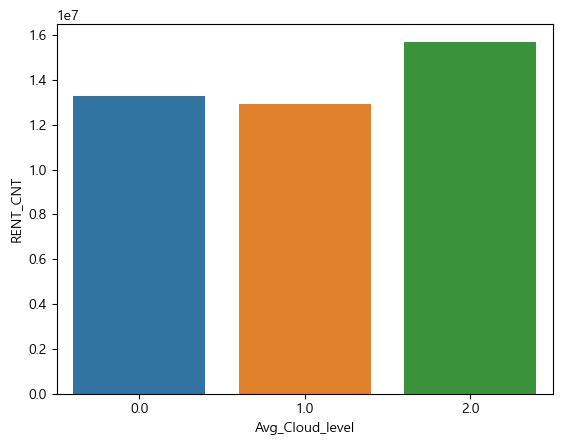

In [41]:
sns.barplot(data=cloud_rent,x='Avg_Cloud_level',y='RENT_CNT')

### 구름양에 따른 렌트 횟수

In [42]:
merged_df['avgTa'].unique()

array(['-2.2', '1.0', '-0.1', '1.2', '1.3', '3.1', '6.3', '2.4', '-1.2',
       '-0.6', '-1.0', '-2.9', '-2.3', '-2.7', '-1.7', '0.3', '1.9',
       '0.7', '-0.4', '3.0', '4.6', '2.8', '4.3', '5.5', '5.9', '6.8',
       '6.0', '5.2', '3.9', '2.6', '1.5', '-1.6', '-8.3', '-6.4', '-0.5',
       '4.0', '7.4', '6.5', '8.1', '9.8', '-1.4', '-5.9', '-4.1', '6.7',
       '2.5', '7.0', '6.4', '6.1', '4.5', '7.7', '5.8', '3.4', '4.8',
       '2.2', '1.4', '3.7', '9.3', '11.1', '3.8', '4.9', '3.6', '6.6',
       '10.0', '9.1', '8.8', '12.8', '11.0', '10.6', '11.4', '12.5',
       '14.8', '11.9', '8.7', '10.2', '11.3', '8.9', '7.2', '9.4', '10.7',
       '9.9', '12.4', '13.0', '13.2', '16.0', '13.5', '12.3', '7.9',
       '13.1', '12.9', '13.9', '14.9', '17.1', '20.2', '20.3', '21.8',
       '19.4', '20.7', '19.9', '14.2', '14.4', '16.5', '14.3', '16.1',
       '19.3', '16.7', '19.1', '17.4', '18.5', '20.1', '16.6', '16.2',
       '18.7', '22.6', '21.2', '19.7', '17.9', '22.0', '21.9', '23.0',
  

In [43]:
merged_df['avgTa'] = merged_df['avgTa'].astype(float)

In [44]:
merged_df.loc[merged_df['avgTa'] <0, 'Avg_Temperature_level'] = 0
merged_df.loc[(merged_df['avgTa'] >=0)&(merged_df['avgTa'] <10), 'Avg_Temperature_level'] =1
merged_df.loc[(merged_df['avgTa'] >=10)&(merged_df['avgTa'] < 20), 'Avg_Temperature_level'] = 2
merged_df.loc[(merged_df['avgTa'] >=20)&(merged_df['avgTa'] < 30), 'Avg_Temperature_level'] = 3
merged_df.loc[(merged_df['avgTa'] >=30), 'Avg_Temperature_level'] = 4


In [45]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0
2,양천구,732. 신월중학교,2020-01-01,9,2,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,서울,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50,0906,2.6,50,0904,0.6,509,50,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0,0.0
1093658,도봉구,1765.쌍문역 1번출구 주변,2022-12-30,19,24,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0,0.0
1093659,도봉구,1767.방학초등학교 앞,2022-12-30,20,16,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1.8,0.0,-{눈}-0235. {박무}0735-{박무}{강도0}0900-0910.,,2022,12,30,4.0,4,0.0,0.0
1093660,도봉구,1768.신동아타워 버스정류소,2022-12-30,10,8,서울,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270,1519,4.6,270,1523,1.9,1668,270,-7.7,36,1635,65.6,3.5,1020.8,1032.8,0923,1030.3,1442,1031.8,9.6,7.9,1200,1.9,10.84,,,,,,1.4,1.4,-2.2,-11.2,-0.4,-0.7,-0.5,0.6,2.9,6.6,10.4,16.1,18.0,1.3,1

In [46]:
avg_rent_cnt=merged_df.groupby('Avg_Temperature_level')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

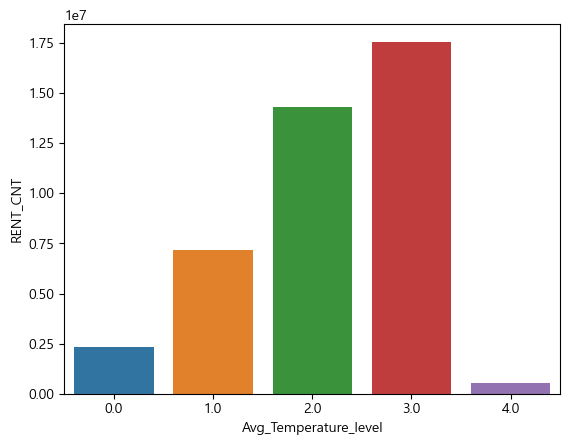

In [47]:
sns.barplot(data=avg_rent_cnt,x='Avg_Temperature_level',y='RENT_CNT')

### 평균 온도 렌트횟수
- 날씨가 좋은 10도에서 30도 사이에 이용횟수가 많음

### 년도별 공공자전거 이용횟수

In [48]:
year_count = merged_df.groupby('Year')['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Year', ylabel='RENT_CNT'>

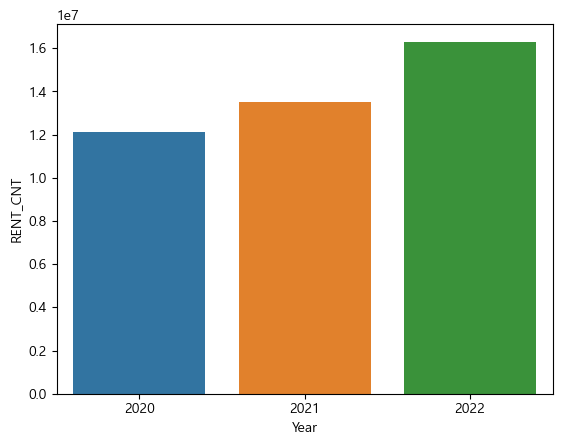

In [49]:
sns.barplot(data=year_count,x='Year',y='RENT_CNT')

### 년도별 이용 횟수
- 꾸준히 성장중

In [50]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'stnNm',
       'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn',
       'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'Year', 'Month', 'Day', 'Season', 'Day_Of_Week',
       'Avg_Cloud_level', 'Avg_Temperature_level'],
      dtype='object')

In [51]:
cloud_temperature = merged_df.groupby(['Avg_Temperature_level','Avg_Cloud_level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

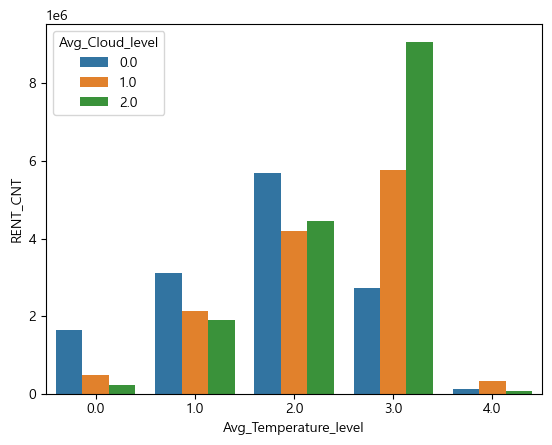

In [52]:
sns.barplot(data=cloud_temperature,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Cloud_level')

### 날씨와 구름양별 렌트 횟수
- 0도에서 20도 사이까지는 맑은 구름이 적은 날씨에 이용자가 많고 날씨가 더운 날에는 구름이 많을때에 렌트횟수가 많음

In [53]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 72 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   STA_LOC                1093662 non-null  object        
 1   RENT_NM                1093662 non-null  object        
 2   STAT_DATA              1093662 non-null  datetime64[ns]
 3   RENT_CNT               1093662 non-null  int32         
 4   RTN_CNT                1093662 non-null  object        
 5   stnNm                  1093662 non-null  object        
 6   avgTa                  1093662 non-null  float64       
 7   minTa                  1093662 non-null  object        
 8   minTaHrmt              1093662 non-null  object        
 9   maxTa                  1093662 non-null  object        
 10  maxTaHrmt              1093662 non-null  object        
 11  mi10MaxRn              1093662 non-null  object        
 12  mi10MaxRnHrmt          10936

In [54]:
columns_to_convert = ['avgTa',
       'minTa',  'maxTa','sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxWs', 'maxWsWd',
       'avgWs', 'maxWd', 'avgTd',
       'avgRhm', 'avgPv', 'avgPa', 'maxPs',  'minPs',
       'avgPs', 'ssDur', 'sumSsHr', 
       'hr1MaxIcsr', 'sumGsr', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn']


In [55]:
import numpy as np

# 빈 문자열을 NaN으로 대체
merged_df[columns_to_convert] = merged_df[columns_to_convert].replace('', np.nan)

# NaN을 제외한 값들을 float으로 변환
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)


In [56]:
merged_df['avgWs'].unique()

array([0.6, 1.2, 1.7, 1.9, 1.1, 3.1, 4. , 3.3, 2.3, 1.5, 2.4, 1.6, 1.8,
       2.2, 2.5, 1.4, 2. , 2.7, 4.6, 2.6, 2.1, 2.8, 3. , 3.4, 4.2, 3.7,
       3.6, 4.8, 3.2, 3.5, 3.8, 4.4, 3.9, 2.9, 1.3, 4.1, 5. , 4.3, 5.8])

<Axes: ylabel='avgWs'>

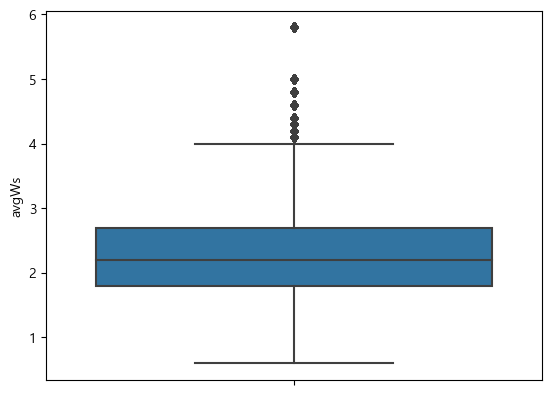

In [57]:
sns.boxplot(merged_df,y='avgWs')

In [58]:
quantiles = np.percentile(merged_df['avgWs'], [0, 25, 50, 75,100])
IQR = quantiles[3]-quantiles[1]
accptable = quantiles[3]+1.5*IQR
print(quantiles)

[0.6 1.8 2.2 2.7 5.8]


In [59]:
def categorize_wind_speed(value):
    if value <= quantiles[0]:
        return '약함'
    elif value <= quantiles[1]:
        return '약간 약함'
    elif value <= quantiles[2]:
        return '보통'
    elif value <= quantiles[3]:
        return '약간 강함'
    elif value <= accptable:
        return '강함'
    else:
        return '매우 강함'

In [60]:
merged_df['Avg_Wind_Level'] = merged_df['avgWs'].apply(categorize_wind_speed)

In [61]:
merged_df.loc[merged_df['Avg_Wind_Level']=='강함']

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level
4995,양천구,729. 서부식자재마트 건너편,2020-01-06,11,14,서울,3.1,0.6,0053,4.6,1158,,,,,14.33,1.8,8.8,70.0,1505,5.4,70.0,1739,3.1,2705,70.0,-3.5,39,0430,65.4,5.0,1015.3,1030.3,0032,1020.5,2400,1026.0,9.7,0.0,1100,0.64,2.03,,,,,,9.8,7.5,1.0,-3.4,1.0,1.3,1.9,2.6,3.4,6.4,9.2,14.9,16.8,0.7,1.0,17.8,{눈}0940-{진눈깨비}0955-{눈}1010-{진눈깨비}1055-{비}1115-...,,2020,1,6,4.0,0,2.0,1.0,강함
4996,양천구,731. 서울시 도로환경관리센터,2020-01-06,4,14,서울,3.1,0.6,0053,4.6,1158,,,,,14.33,1.8,8.8,70.0,1505,5.4,70.0,1739,3.1,2705,70.0,-3.5,39,0430,65.4,5.0,1015.3,1030.3,0032,1020.5,2400,1026.0,9.7,0.0,1100,0.64,2.03,,,,,,9.8,7.5,1.0,-3.4,1.0,1.3,1.9,2.6,3.4,6.4,9.2,14.9,16.8,0.7,1.0,17.8,{눈}0940-{진눈깨비}0955-{눈}1010-{진눈깨비}1055-{비}1115-...,,2020,1,6,4.0,0,2.0,1.0,강함
4997,양천구,732. 신월중학교,2020-01-06,3,4,서울,3.1,0.6,0053,4.6,1158,,,,,14.33,1.8,8.8,70.0,1505,5.4,70.0,1739,3.1,2705,70.0,-3.5,39,0430,65.4,5.0,1015.3,1030.3,0032,1020.5,2400,1026.0,9.7,0.0,1100,0.64,2.03,,,,,,9.8,7.5,1.0,-3.4,1.0,1.3,1.9,2.6,3.4,6.4,9.2,14.9,16.8,0.7,1.0,17.8,{눈}0940-{진눈깨비}0955-{눈}1010-{진눈깨비}1055-{비}1115-...,,2020,1,6,4.0,0,2.0,1.0,강함
4998,양천구,733. 신정이펜하우스314동,2020-01-06,6,3,서울,3.1,0.6,0053,4.6,1158,,,,,14.33,1.8,8.8,70.0,1505,5.4,70.0,1739,3.1,2705,70.0,-3.5,39,0430,65.4,5.0,1015.3,1030.3,0032,1020.5,2400,1026.0,9.7,0.0,1100,0.64,2.03,,,,,,9.8,7.5,1.0,-3.4,1.0,1.3,1.9,2.6,3.4,6.4,9.2,14.9,16.8,0.7,1.0,17.8,{눈}0940-{진눈깨비}0955-{눈}1010-{진눈깨비}1055-{비}1115-...,,2020,1,6,4.0,0,2.0,1.0,강함
4999,양천구,734. 신트리공원 입구,2020-01-06,7,5,서울,3.1,0.6,0053,4.6,1158,,,,,14.33,1.8,8.8,70.0,1505,5.4,70.0,1739,3.1,2705,70.0,-3.5,39,0430,65.4,5.0,1015.3,1030.3,0032,1020.5,2400,1026.0,9.7,0.0,1100,0.64,2.03,,,,,,9.8,7.5,1.0,-3.4,1.0,1.3,1.9,2.6,3.4,6.4,9.2,14.9,16.8,0.7,1.0,17.8,{눈}0940-{진눈깨비}0955-{눈}1010-{진눈깨비}1055-{비}1115-...,,2020,1,6,4.0,0,2.0,1.0,강함
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077673,도봉구,1770.도봉한신아파트 주변,2022-12-14,13,19,서울,-8.4,-11.0,0742,-4.9,1451,,,,,0.00,0.0,14.7,320.0,0028,6.9,320.0,0024,3.2,2735,290.0,-16.9,43,1143,50.1,1.6,1017.0,1030.5,1058,1024.3,0001,1028.3,9.6,8.9,1200,1.95,11.41,,,0.5,0001,,1.4,1.4,-3.7,-12.8,1.1,1.5,2.4,4.0,6.0,9.6,13.3,17.7,18.5,1.0,1.4,0.0,,,2022,12,14,4.0,2,0.0,0.0,강함
1077674,도봉구,1771.성원APT버스정류소,2022-12-14,15,11,서울,-8.4,-11.0,0742,-4.9,1451,,,,,0.00,0.0,14.7,320.0,0028,6.9,320.0,0024,3.2,2735,290.0,-16.9,43,1143,50.1,1.6,1017.0,1030.5,1058,1024.3,0001,1028.3,9.6,8.9,1200,1.95,11.41,,,0.5,0001,,1.4,1.4,-3.7,-12.8,1.1,1.5,2.4,4.0,6.0,9.6,13.3,17.7,18.5,1.0,1.4,0.0,,,2022,12,14,4.0,2,0.0,0.0,강함
1077675,도봉구,1772.시립도봉노인복지관 버스정류소,2022-12-14,9,3,서울,-8.4,-11.0,0742,-4.9,1451,,,,,0.00,0.0,14.7,320.0,0028,6.9,320.0,0024,3.2,2735,290.0,-16.9,43,1143,50.1,1.6,1017.0,1030.5,1058,1024.3,0001,1028.3,9.6,8.9,1200,1.95,11.41,,,0.5,0001,,1.4,1.4,-3.7,-12.8,1.1,1.5,2.4,4.0,6.0,9.6,13.3,17.7,18.5,1.0,1.4,0.0,,,2022,12,14,4.0,2,0.0,0.0,강함
1077676,도봉구,1774.정의여중고 버스정류소,2022-12-14,8,6,서울,-8.4,-11.0,0742,-4.9,1451,,,,,0.00,0.0,14.7,320.0,0028,6.9,320.0,0024,3.2,2735,290.0,-16.9,43,1143,50.1,1.6,1017.0,1030.5,1058,1024.3,0001,1028.3,9.6,8.9,1200,1.95,11.41,,,0.5,0001,,1.4,1.4,-3.7,-12.8,1.1,1.5,2.4,4.0,6.0,9.6,13.3,17.7,18.5,1.0,1.4,0.0,,,

<Axes: ylabel='avgRhm'>

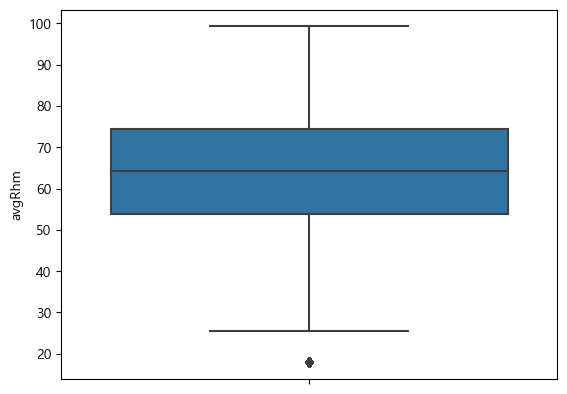

In [62]:
sns.boxplot(merged_df,y='avgRhm')

In [63]:
humid_quantiles = np.percentile(merged_df['avgRhm'], [0, 25, 50, 75,100])

In [64]:
humid_IQR = humid_quantiles[3]-humid_quantiles[1]
humid_accptable = humid_quantiles[3]-1.5*humid_IQR
print(humid_quantiles)

[17.9 53.8 64.3 74.5 99.3]


In [65]:
def categorize_humid(value):
    if value < humid_quantiles[1]:
        return '낮음'
    elif value <= humid_quantiles[3]:
        return '보통'
    elif value <= humid_quantiles[4]:
        return '높음'

In [66]:
merged_df['Avg_Humid_Level'] = merged_df['avgRhm'].apply(categorize_humid)

In [67]:
merged_df.loc[merged_df['Avg_Humid_Level']=='낮음']

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,stnNm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level,Avg_Humid_Level
2997,양천구,729. 서부식자재마트 건너편,2020-01-04,22,20,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,,,,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,,2020,1,4,4.0,5,0.0,1.0,보통,낮음
2998,양천구,731. 서울시 도로환경관리센터,2020-01-04,25,29,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,,,,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,,2020,1,4,4.0,5,0.0,1.0,보통,낮음
2999,양천구,732. 신월중학교,2020-01-04,5,6,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,,,,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,,2020,1,4,4.0,5,0.0,1.0,보통,낮음
3000,양천구,733. 신정이펜하우스314동,2020-01-04,5,4,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,,,,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,,2020,1,4,4.0,5,0.0,1.0,보통,낮음
3001,양천구,734. 신트리공원 입구,2020-01-04,22,23,서울,1.2,-2.8,0512,6.1,1450,,,,,0.0,0.0,8.5,340.0,1206,4.5,320.0,1228,1.9,1623,50.0,-8.2,32,1457,50.8,3.3,1015.4,1028.4,2339,1024.4,1410,1026.2,9.7,7.9,1200,1.68,9.29,,,,,,2.1,2.1,0.0,-8.8,0.4,1.1,1.9,2.7,3.6,6.7,9.5,15.1,16.9,1.5,2.1,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-{연무}{강도0}090...,,2020,1,4,4.0,5,0.0,1.0,보통,낮음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081669,마포구,490.가온문화공원,2022-12-18,6,11,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2,0.8,2.3,4.5,8.7,12.5,17.3,18.4,1.0,1.4,NaN,,,2022,12,18,4.0,6,0.0,0.0,약간 강함,낮음
1081670,마포구,491.월드컵파크 4단지,2022-12-18,1,1,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2,0.8,2.3,4.5,8.7,12.5,17.3,18.4,1.0,1.4,NaN,,,2022,12,18,4.0,6,0.0,0.0,약간 강함,낮음
1081671,마포구,492.성산시영아파트 후문,2022-12-18,28,31,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2,0.8,2.3,4.5,8.7,12.5,17.3,18.4,1.0,1.4,NaN,,,2022,12,18,4.0,6,0.0,0.0,약간 강함,낮음
1081672,마포구,493.홍대입구역 6번출구,2022-12-18,15,16,서울,-9.5,-12.4,0740,-5.6,1440,,,,,0.0,0.0,10.4,270.0,1226,5.8,270.0,1233,2.6,2231,290.0,-18.8,38,0545,47.1,1.4,1012.2,1024.8,2259,1021.8,1500,1023.5,9.6,9.0,1200,1.98,11.42,,,1.5,0001,,0.0,0.0,-5.1,-17.0,-0.3,-0.2

In [68]:
temperature_wind = merged_df.groupby(['Avg_Temperature_level','Avg_Wind_Level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

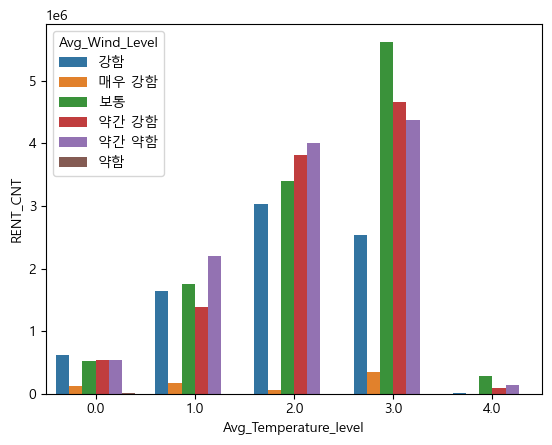

In [69]:
sns.barplot(data=temperature_wind,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Wind_Level')

In [70]:
temperature_humid = merged_df.groupby(['Avg_Temperature_level','Avg_Humid_Level'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='Avg_Temperature_level', ylabel='RENT_CNT'>

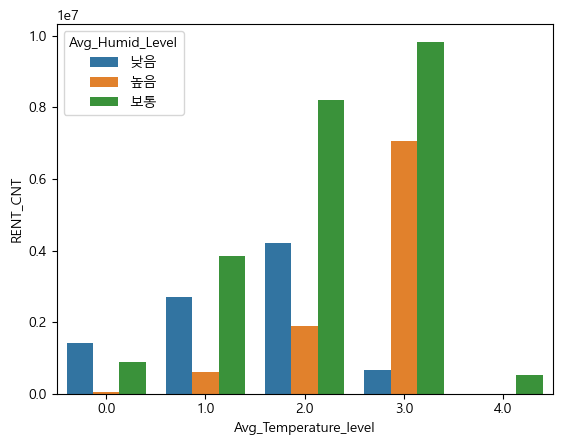

In [71]:
sns.barplot(data=temperature_humid,x='Avg_Temperature_level',y='RENT_CNT',hue='Avg_Humid_Level')

In [72]:
merged_df.drop(columns='stnNm',inplace=True)

In [73]:
merged_df.columns

Index(['STA_LOC', 'RENT_NM', 'STAT_DATA', 'RENT_CNT', 'RTN_CNT', 'avgTa',
       'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn',
       'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'Year', 'Month', 'Day', 'Season', 'Day_Of_Week',
       'Avg_Cloud_level', 'Avg_Temperature_level', 'Avg_Wind_Level',
       'Avg_Humid_Level'],
      dtype='object')

In [74]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 73 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   STA_LOC                1093662 non-null  object        
 1   RENT_NM                1093662 non-null  object        
 2   STAT_DATA              1093662 non-null  datetime64[ns]
 3   RENT_CNT               1093662 non-null  int32         
 4   RTN_CNT                1093662 non-null  object        
 5   avgTa                  1093662 non-null  float64       
 6   minTa                  1092663 non-null  float64       
 7   minTaHrmt              1093662 non-null  object        
 8   maxTa                  1093662 non-null  float64       
 9   maxTaHrmt              1093662 non-null  object        
 10  mi10MaxRn              1093662 non-null  object        
 11  mi10MaxRnHrmt          1093662 non-null  object        
 12  hr1MaxRn               10936

In [75]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
numeric_df = merged_df[numeric_columns]

In [76]:
merged_df_num_corr=numeric_df.corr()

<Axes: >

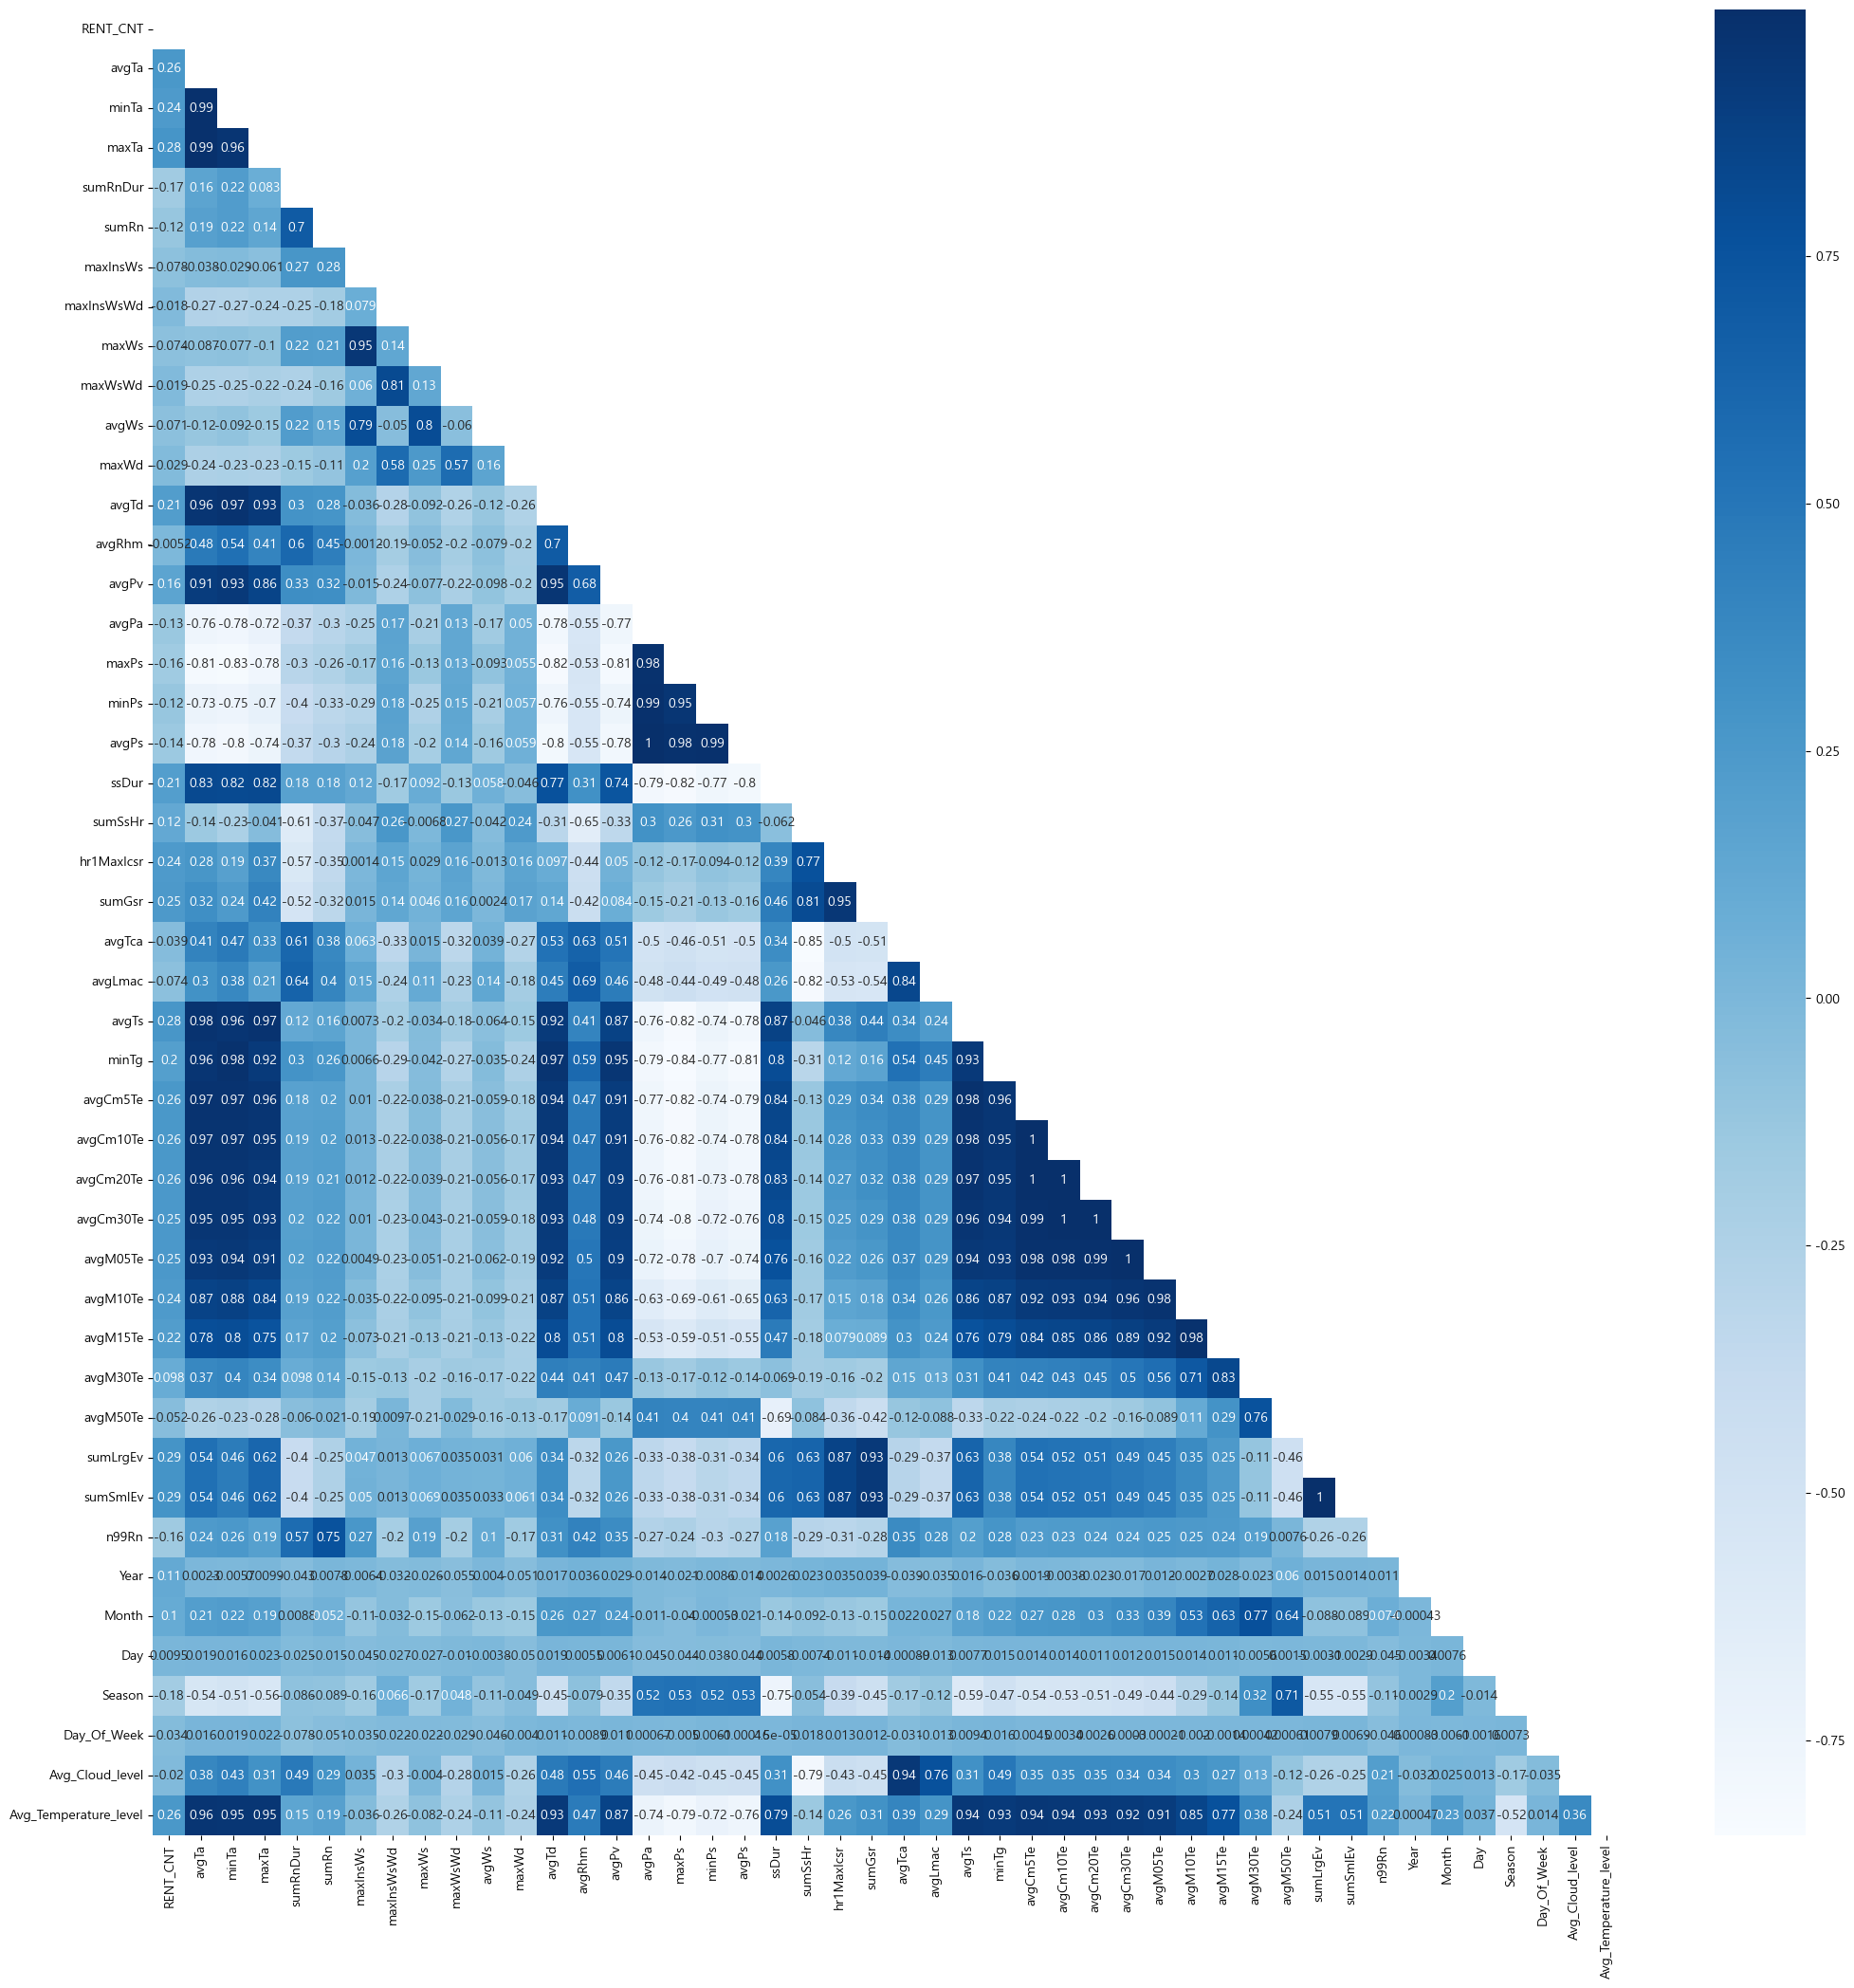

In [77]:
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(merged_df_num_corr, dtype=np.bool_))
sns.heatmap(merged_df_num_corr, annot=True, cmap='Blues', mask=mask)


### 각 컬럼별 상관계수

In [78]:
spring_use = merged_df[merged_df['Season'] == 1]

In [79]:
sorted_spring_use = spring_use.sort_values(by='RENT_CNT', ascending=False)

In [80]:
spring_result = sorted_spring_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [81]:
spring_day_rent=spring_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [82]:
spring_top_50_rent_loc = spring_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

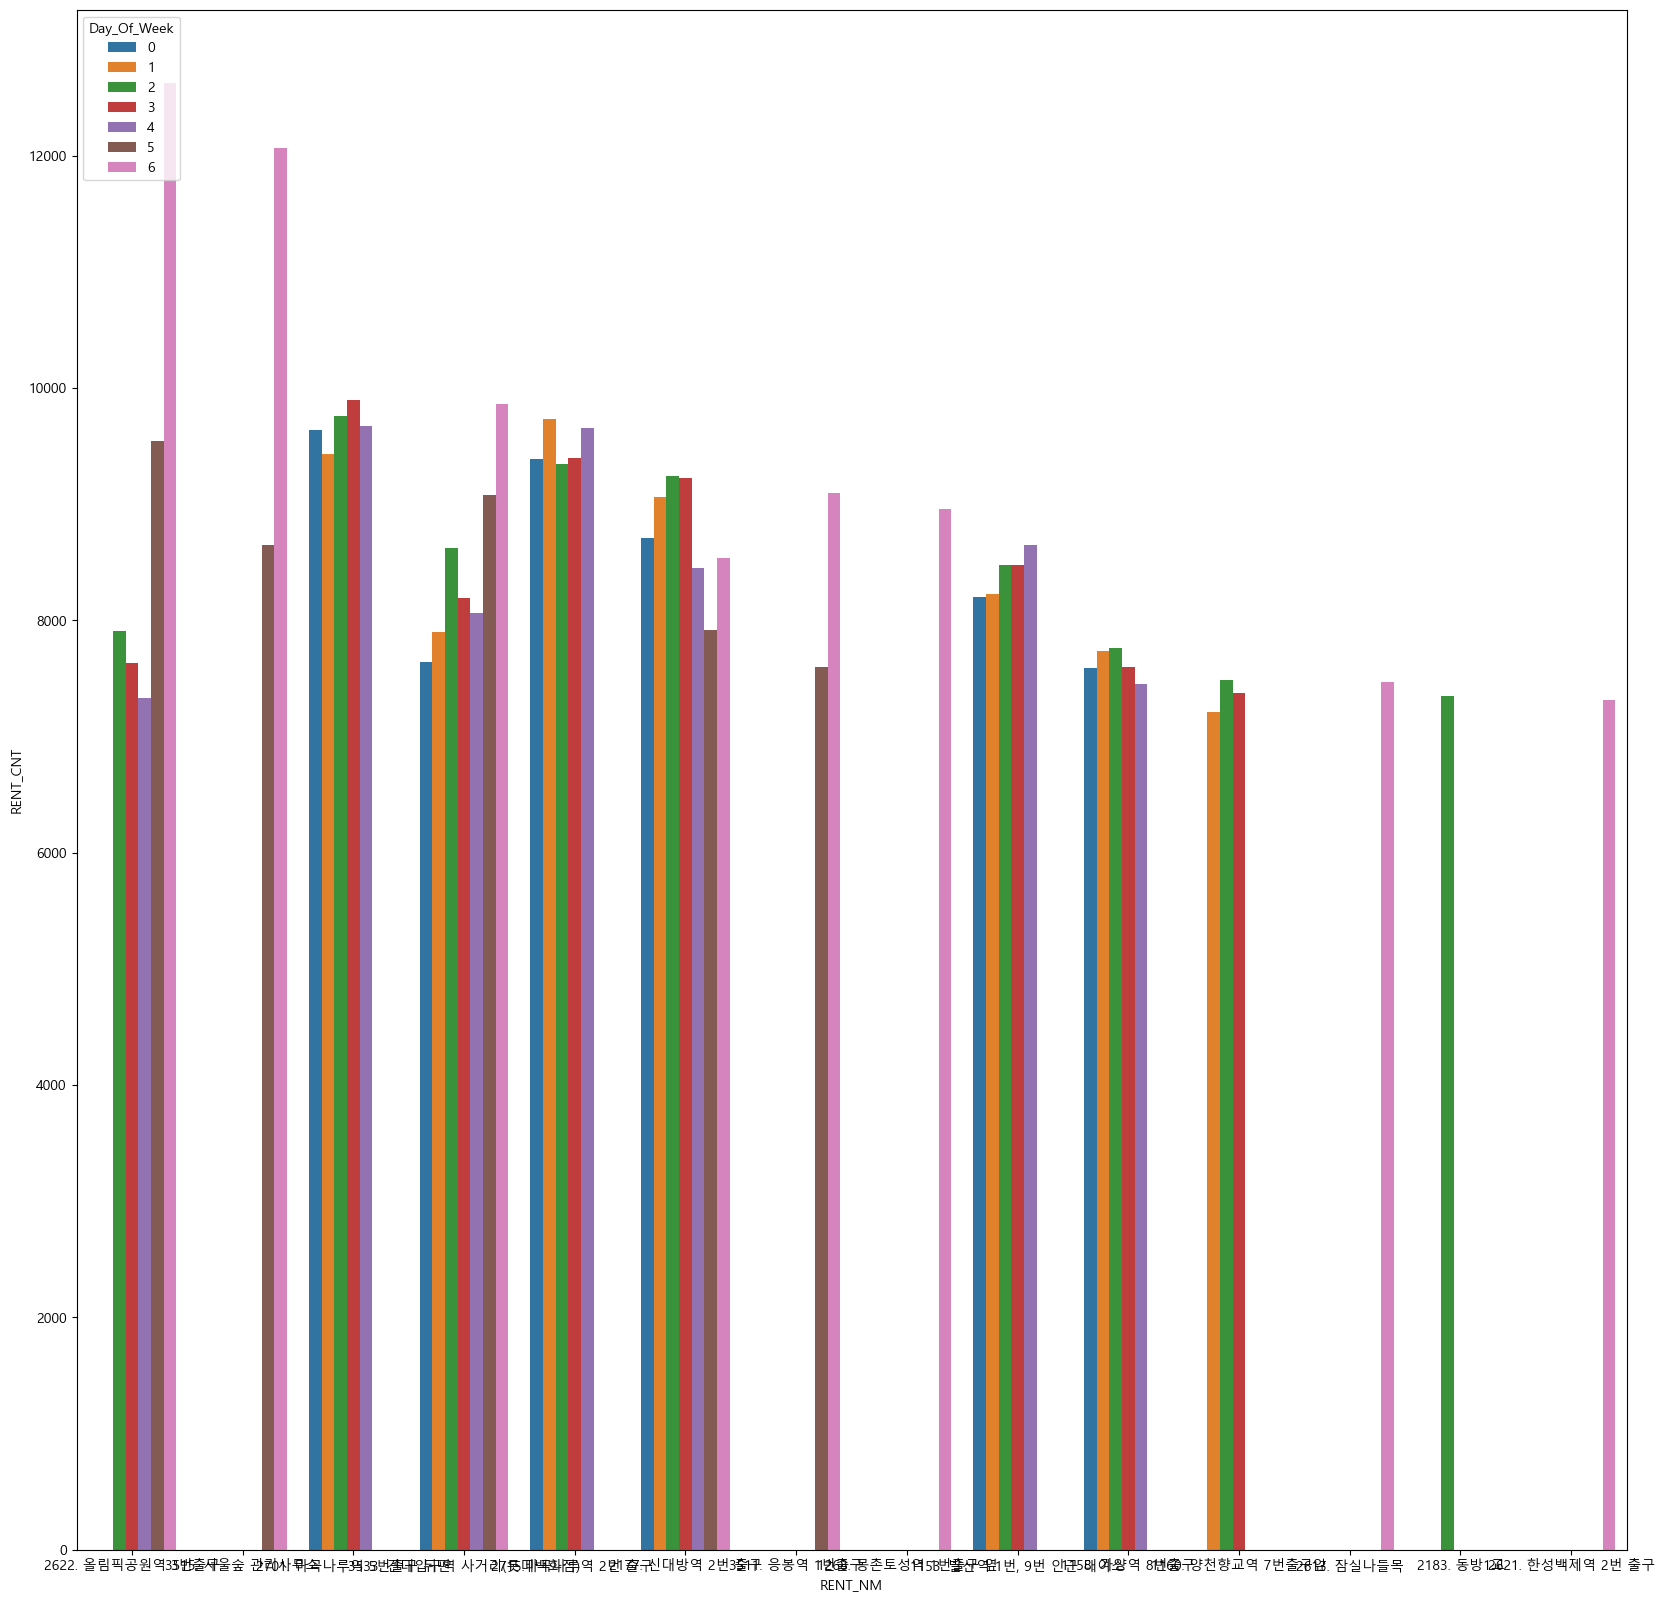

In [83]:
plt.figure(figsize=(20,20))
sns.barplot(data=spring_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 봄 top 최다 렌트 횟수
- 올림픽공원 3번출구 봄에 많음

In [84]:
spring_do_rent=spring_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

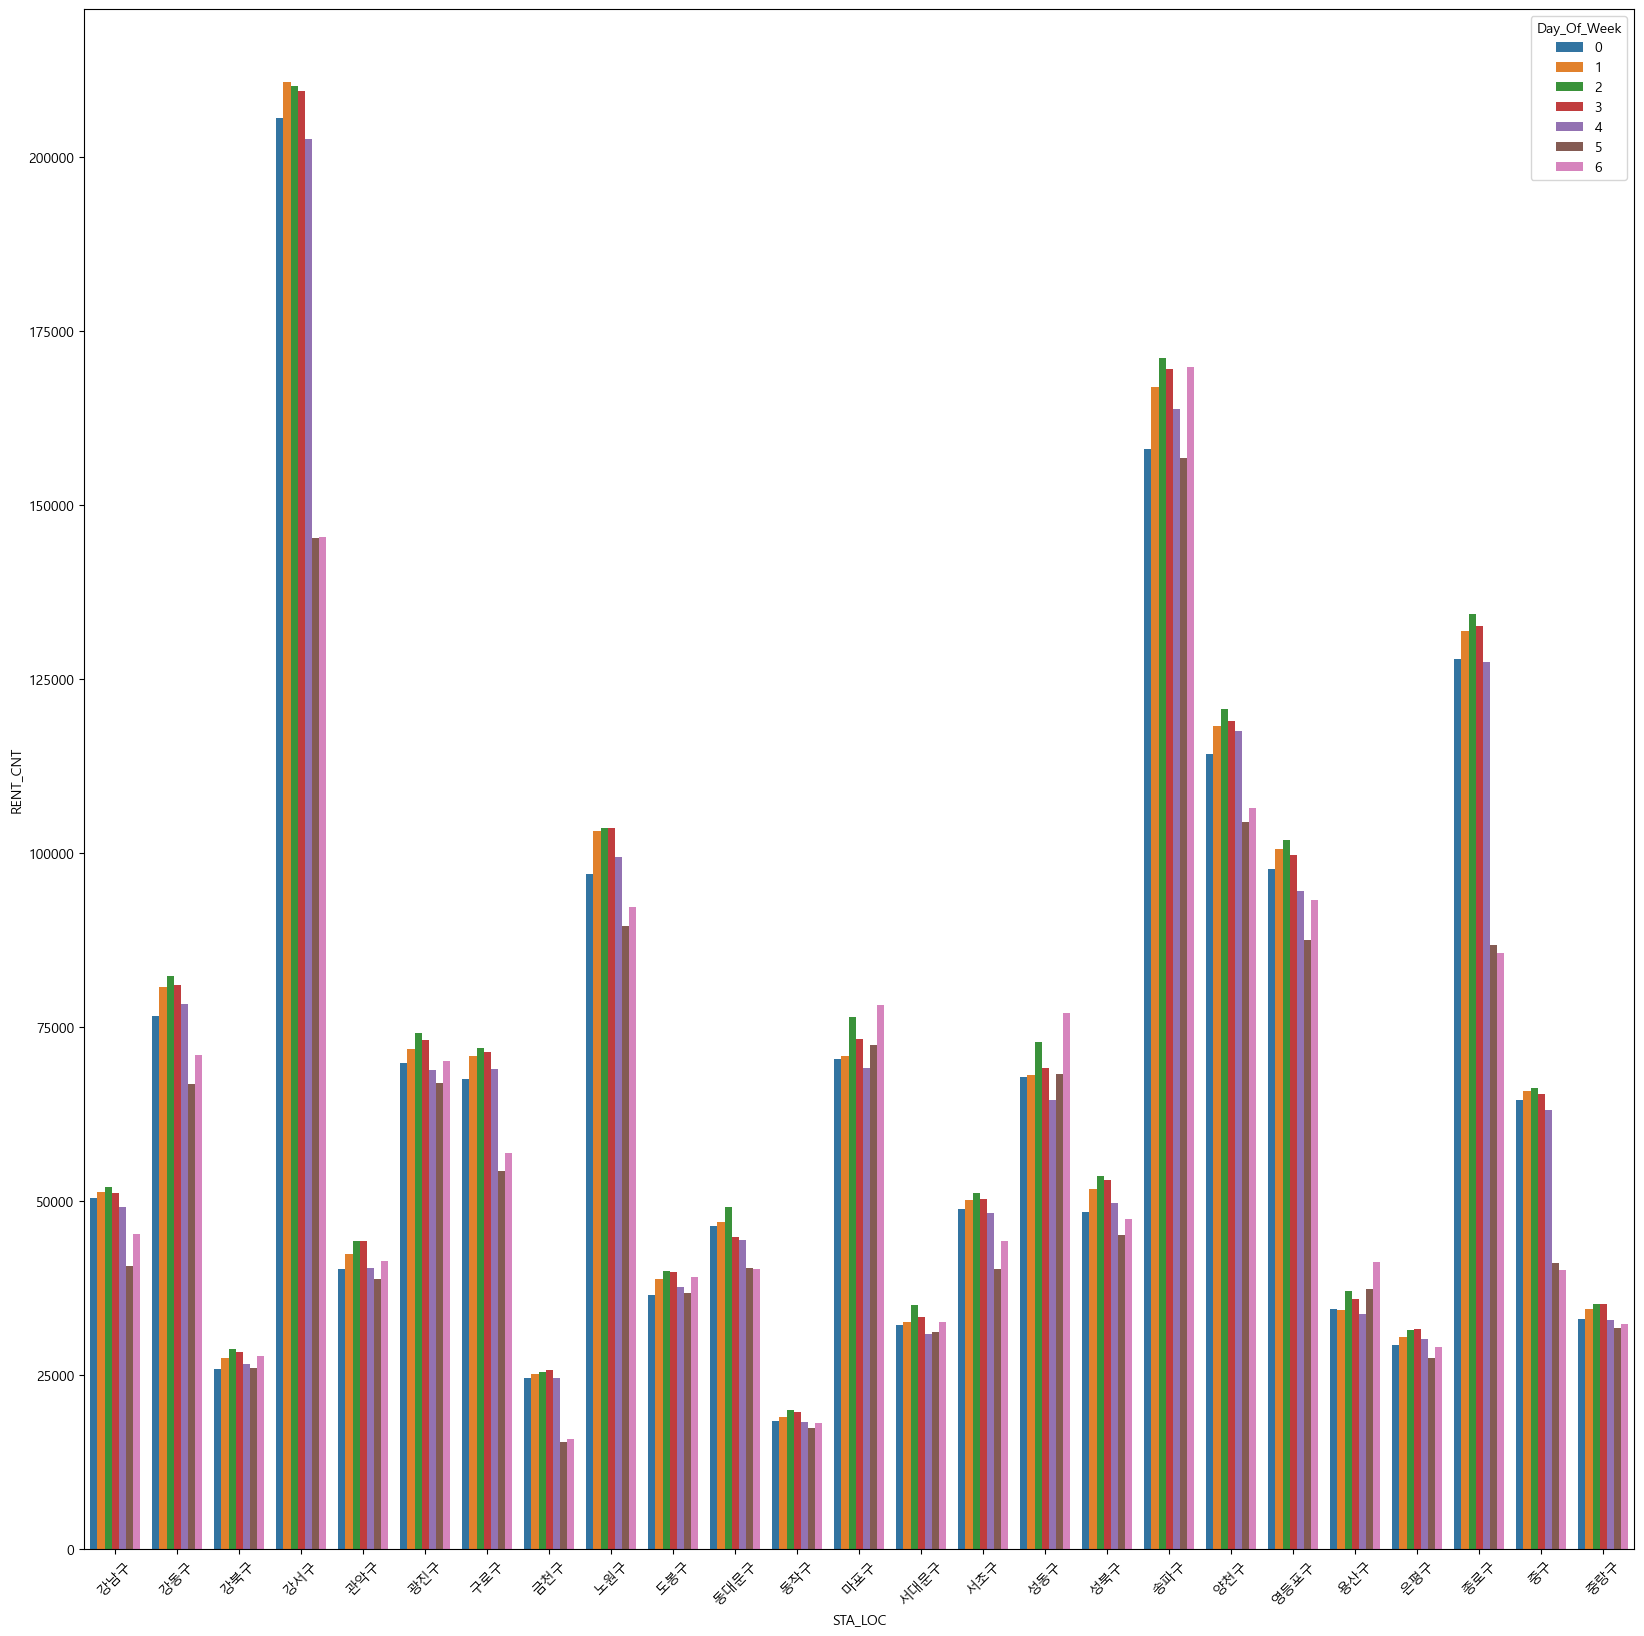

In [85]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=spring_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

In [132]:
spring_do_rent_avg=spring_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()

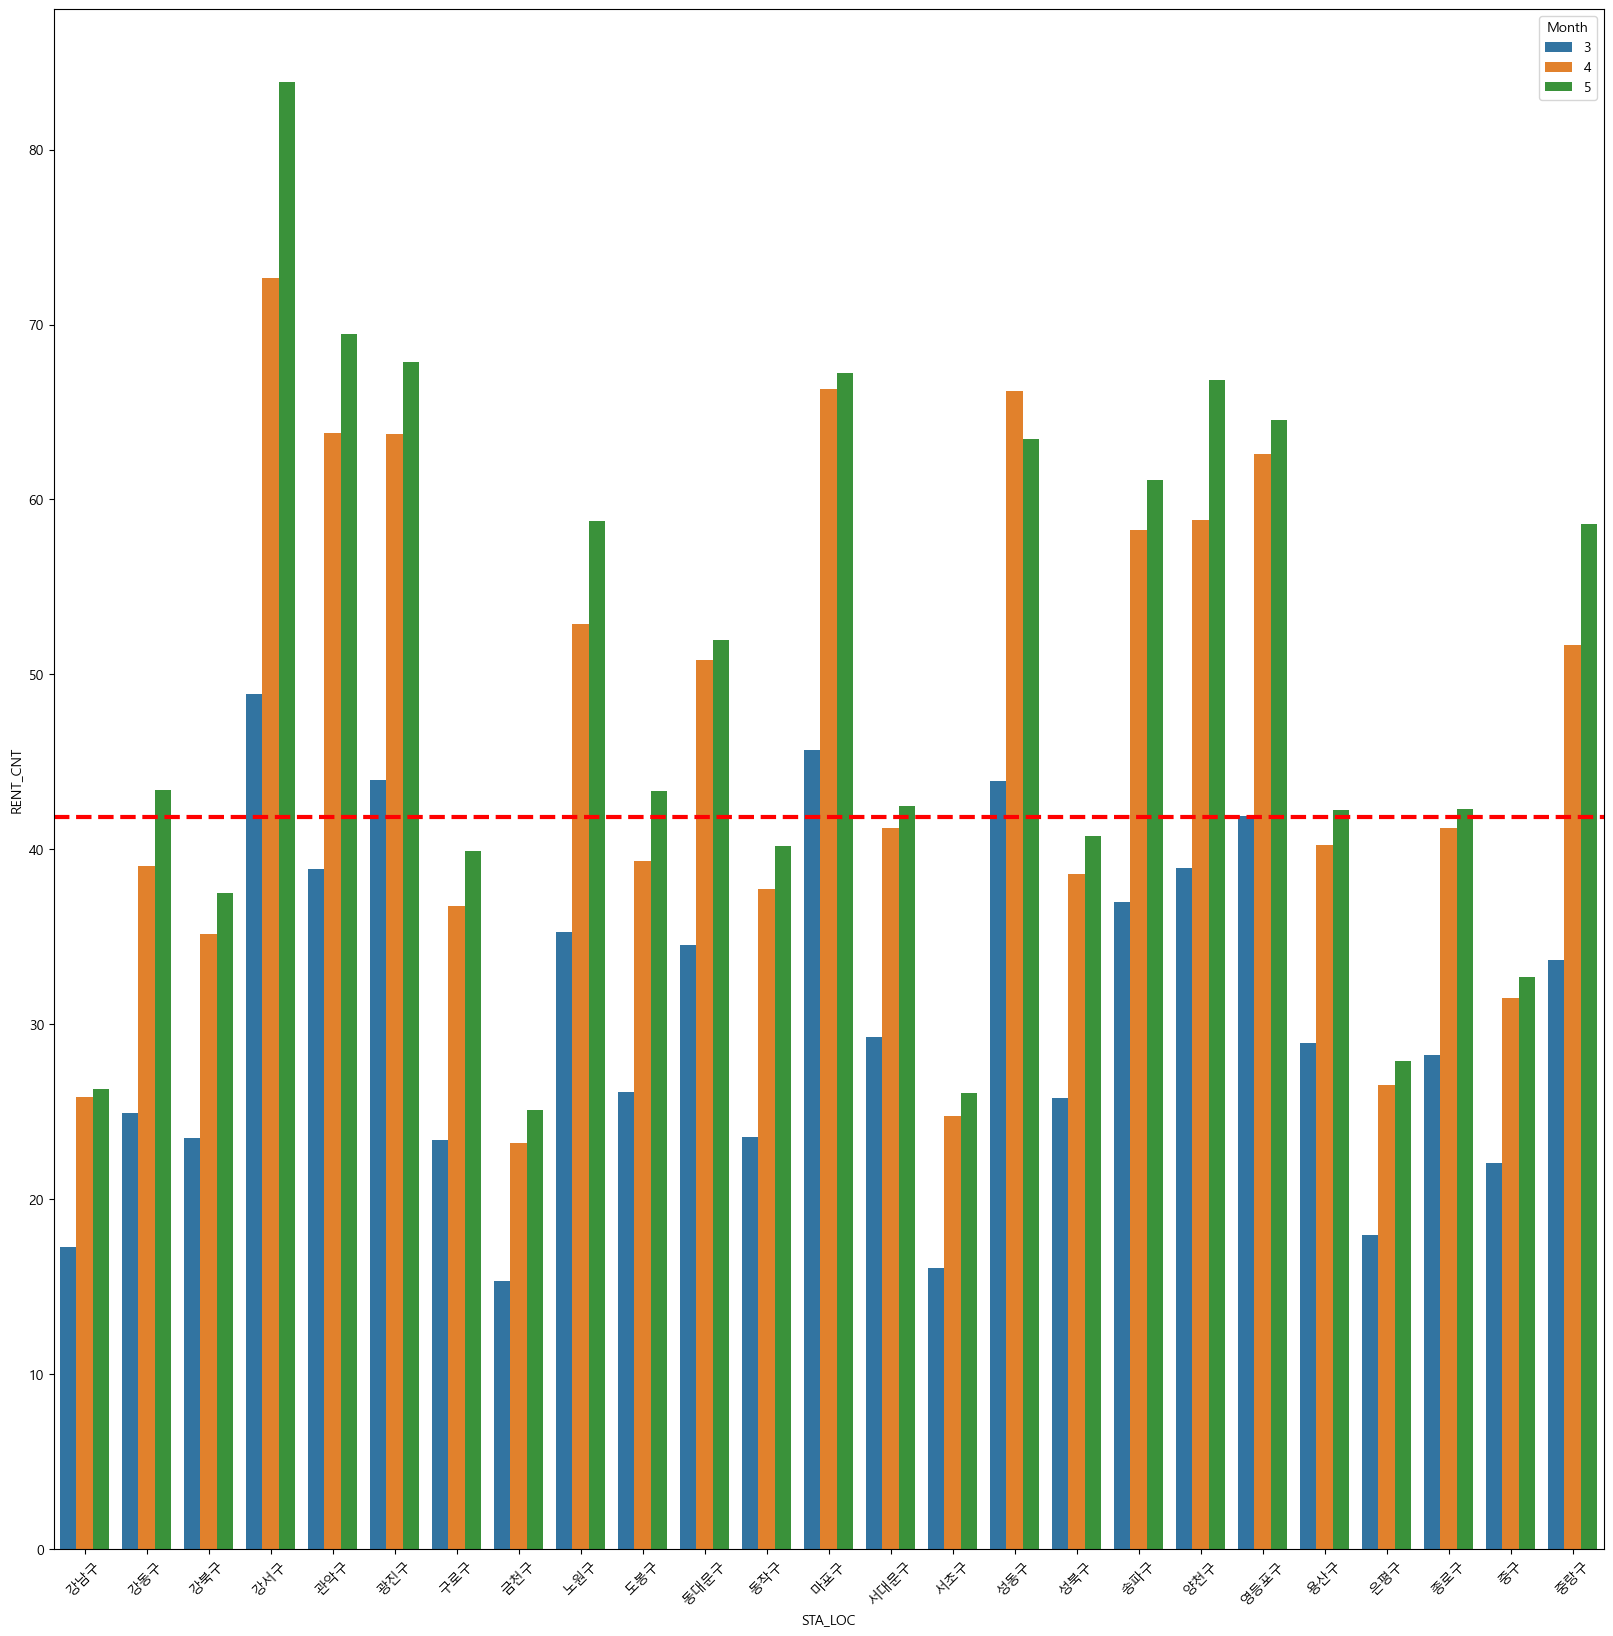

In [134]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=spring_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(spring_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

### 구별 봄 렌트 횟수
- 많은 구가 수요일에 렌트 횟수가 많음

In [86]:
summer_use = merged_df[merged_df['Season'] == 2]

In [87]:
sorted_summer_use = summer_use.sort_values(by='RENT_CNT', ascending=False)

In [88]:
summer_result = sorted_summer_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [89]:
summer_day_rent=spring_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [90]:
summer_top_50_rent_loc = summer_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

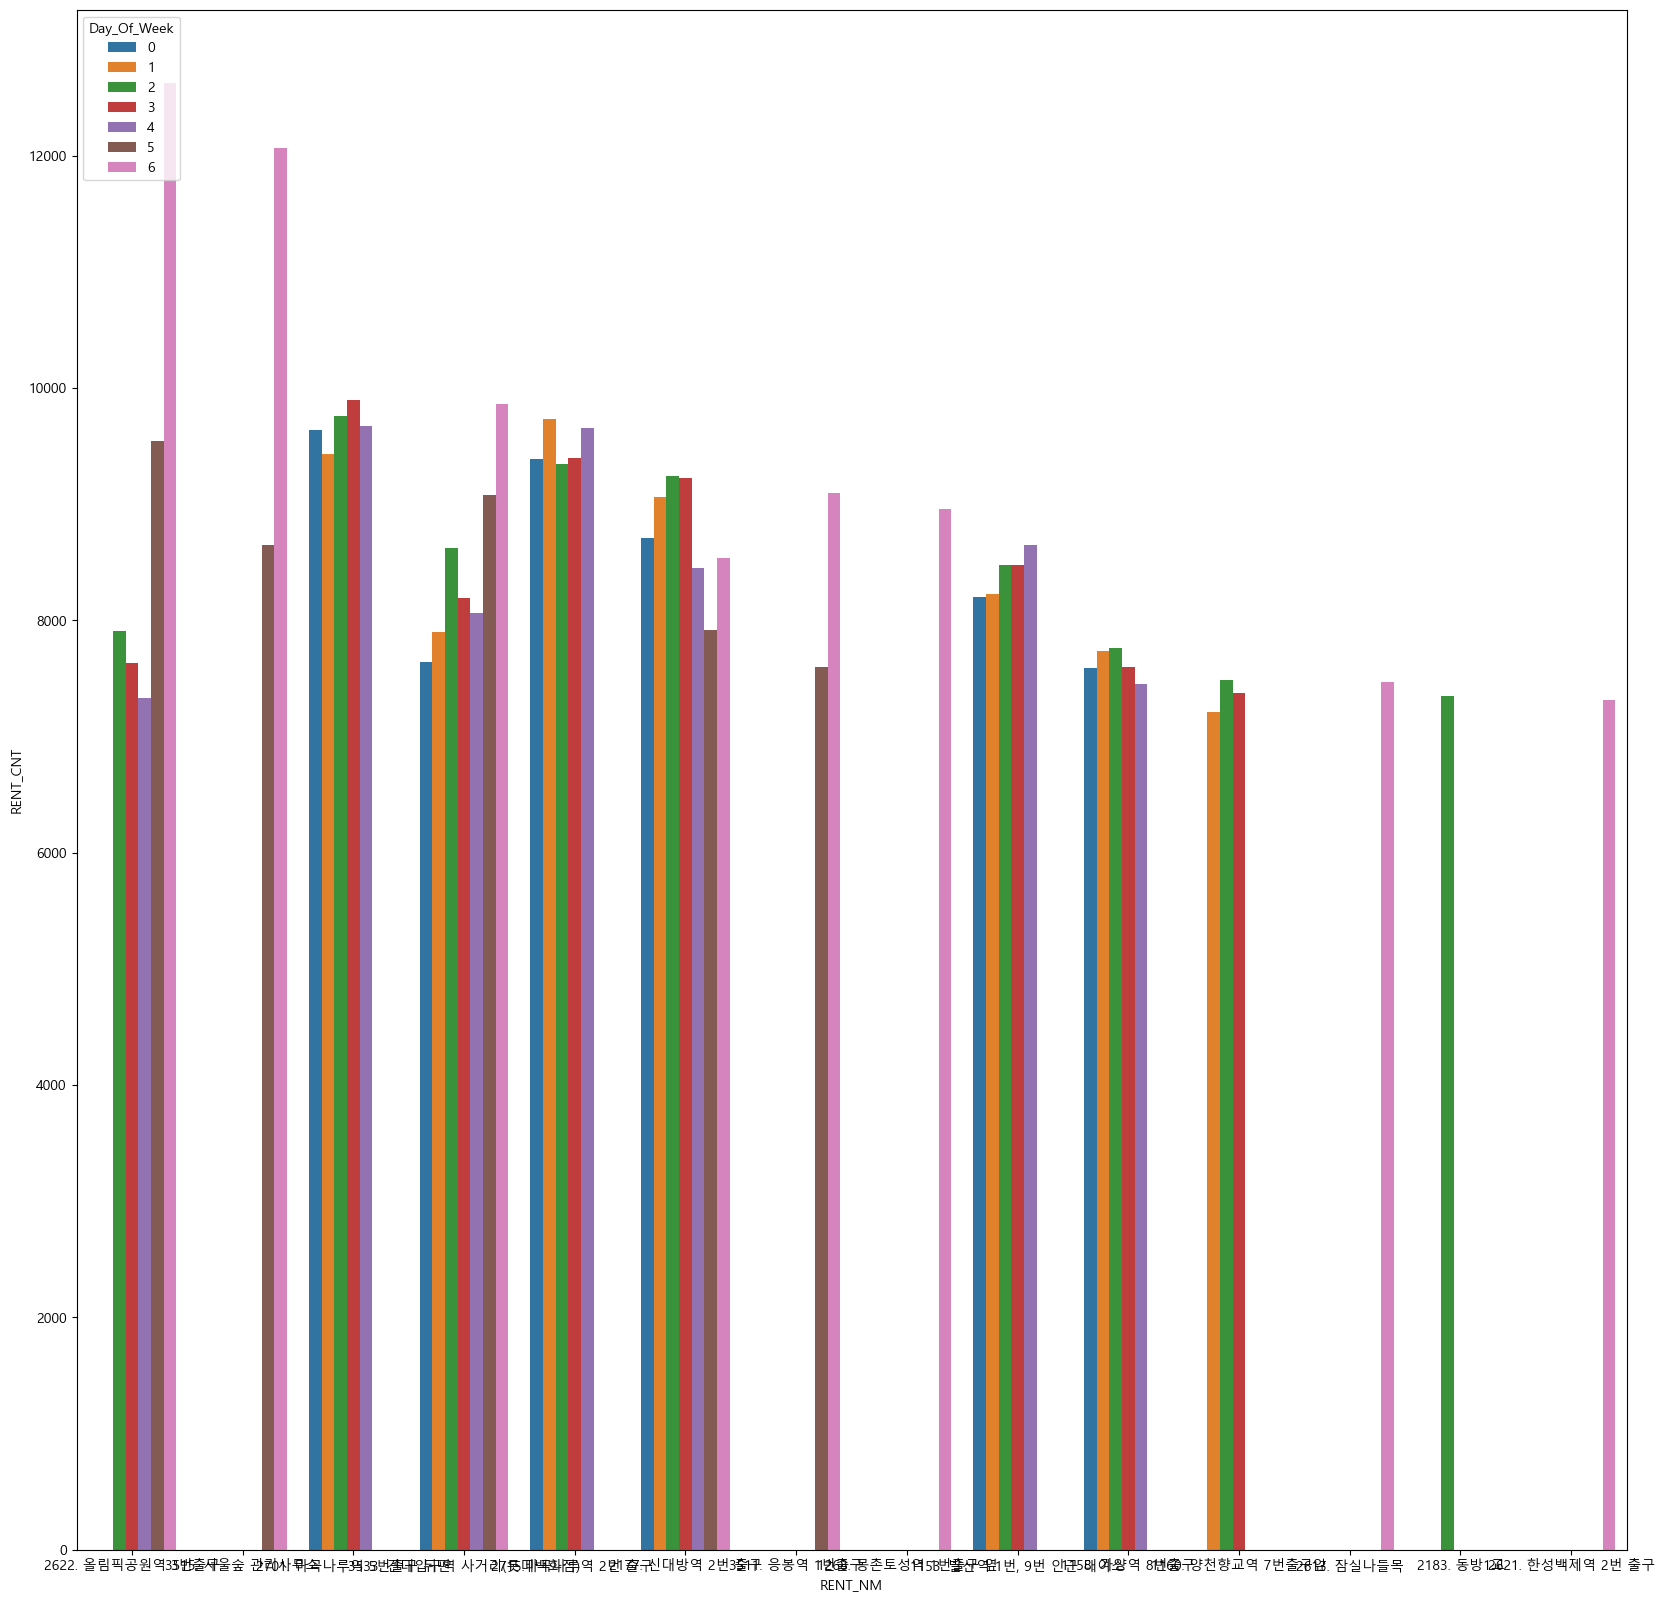

In [91]:
plt.figure(figsize=(20,20))
sns.barplot(data=summer_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 여름 top 50 렌트 횟수
- 올림픽공원에 이용자가 많음

In [92]:
summer_do_rent=spring_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

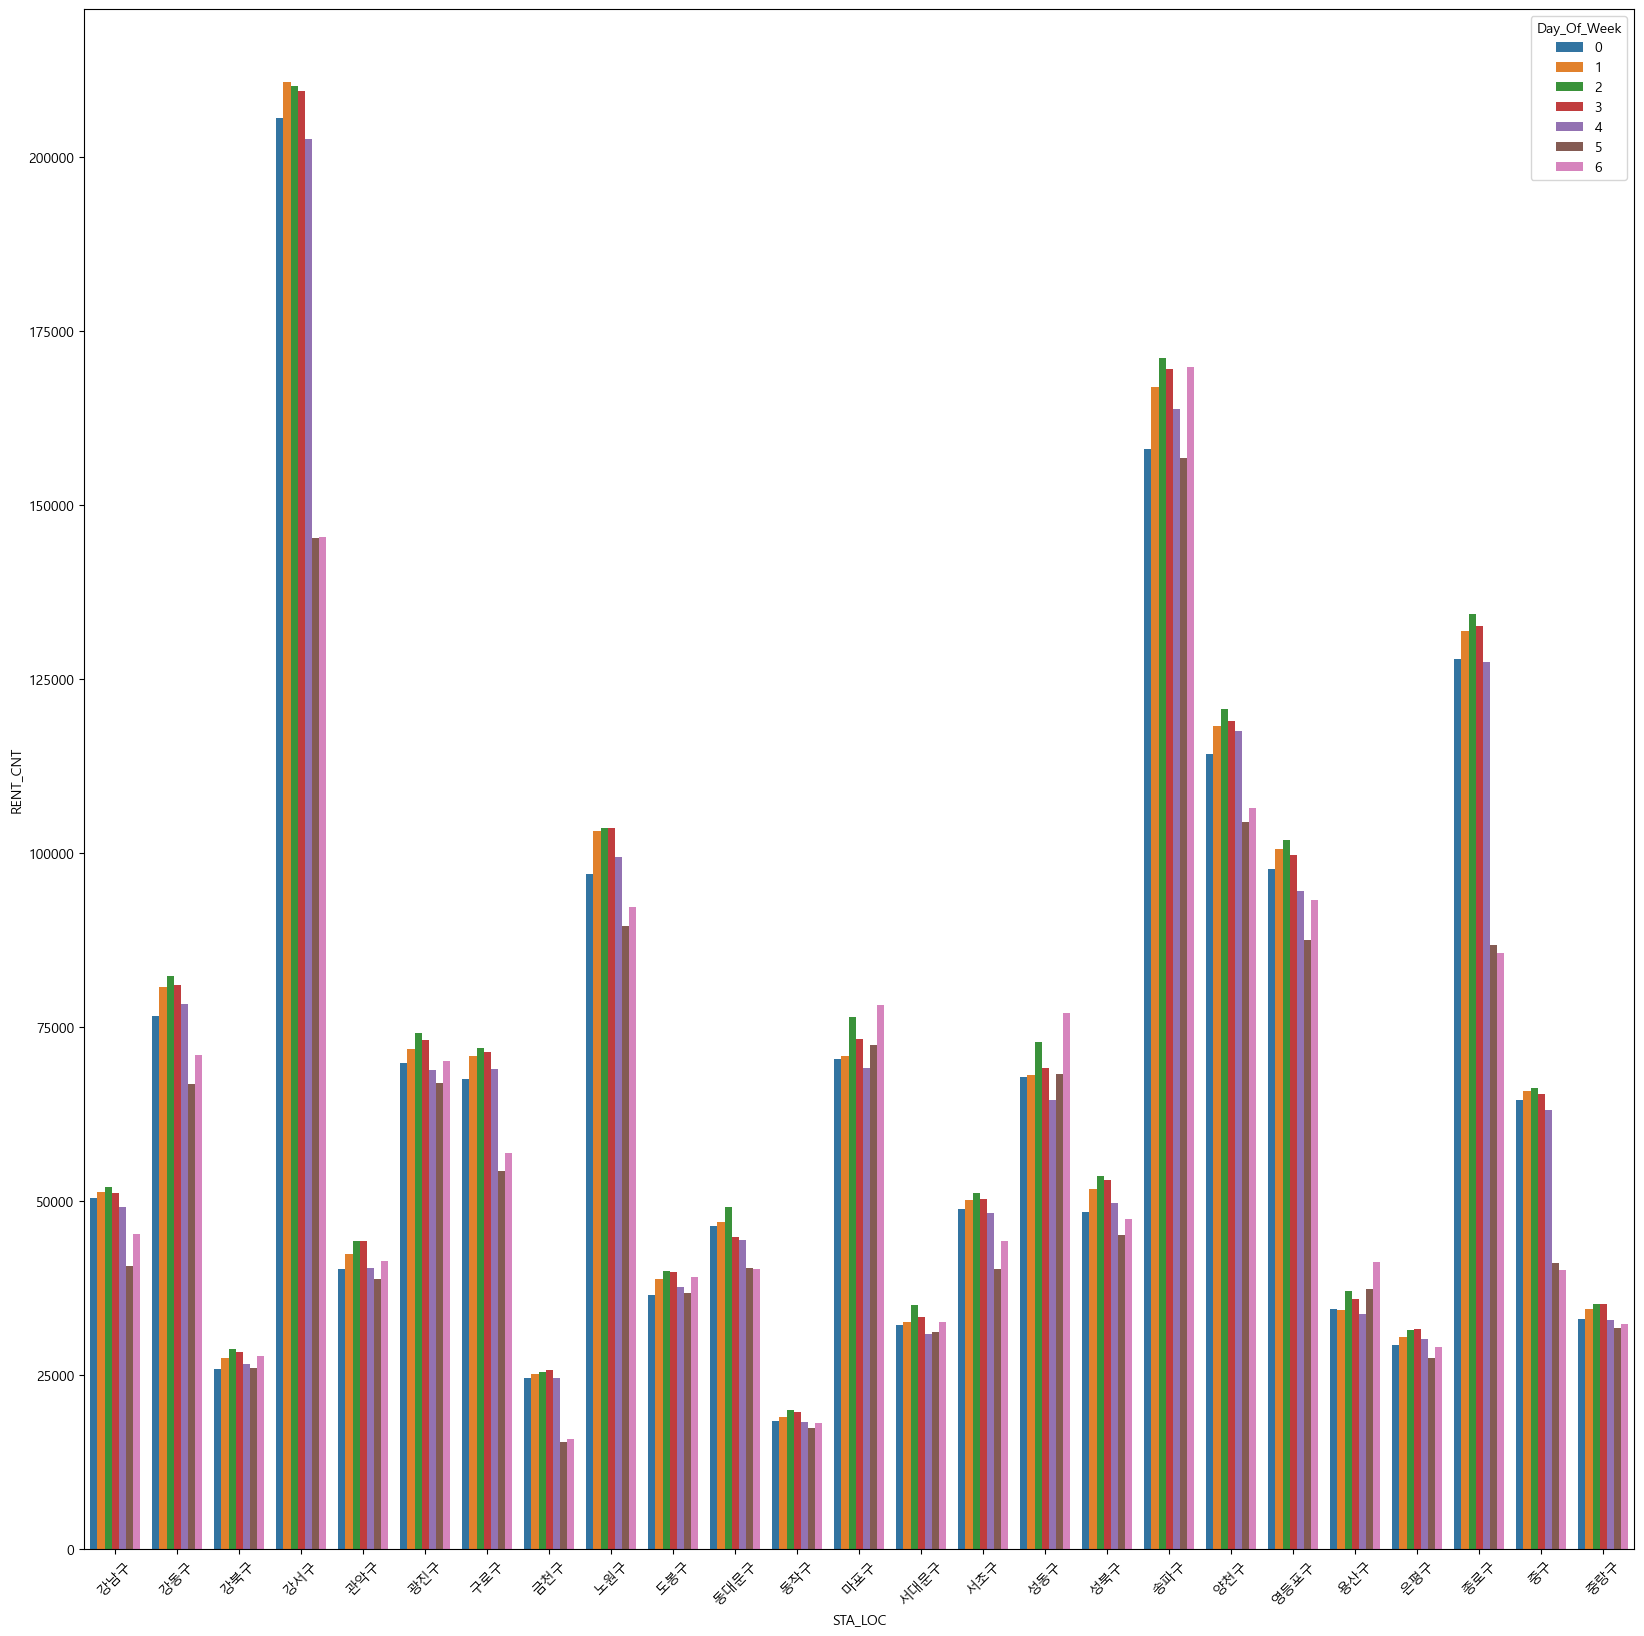

In [93]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=summer_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

### 구별 요일별 여름 렌트 횟수
- 각 구 이용자 중에 대부분 수요일에 이용자가 다른 요일보다 많음

In [135]:
summer_do_rent_avg=summer_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()

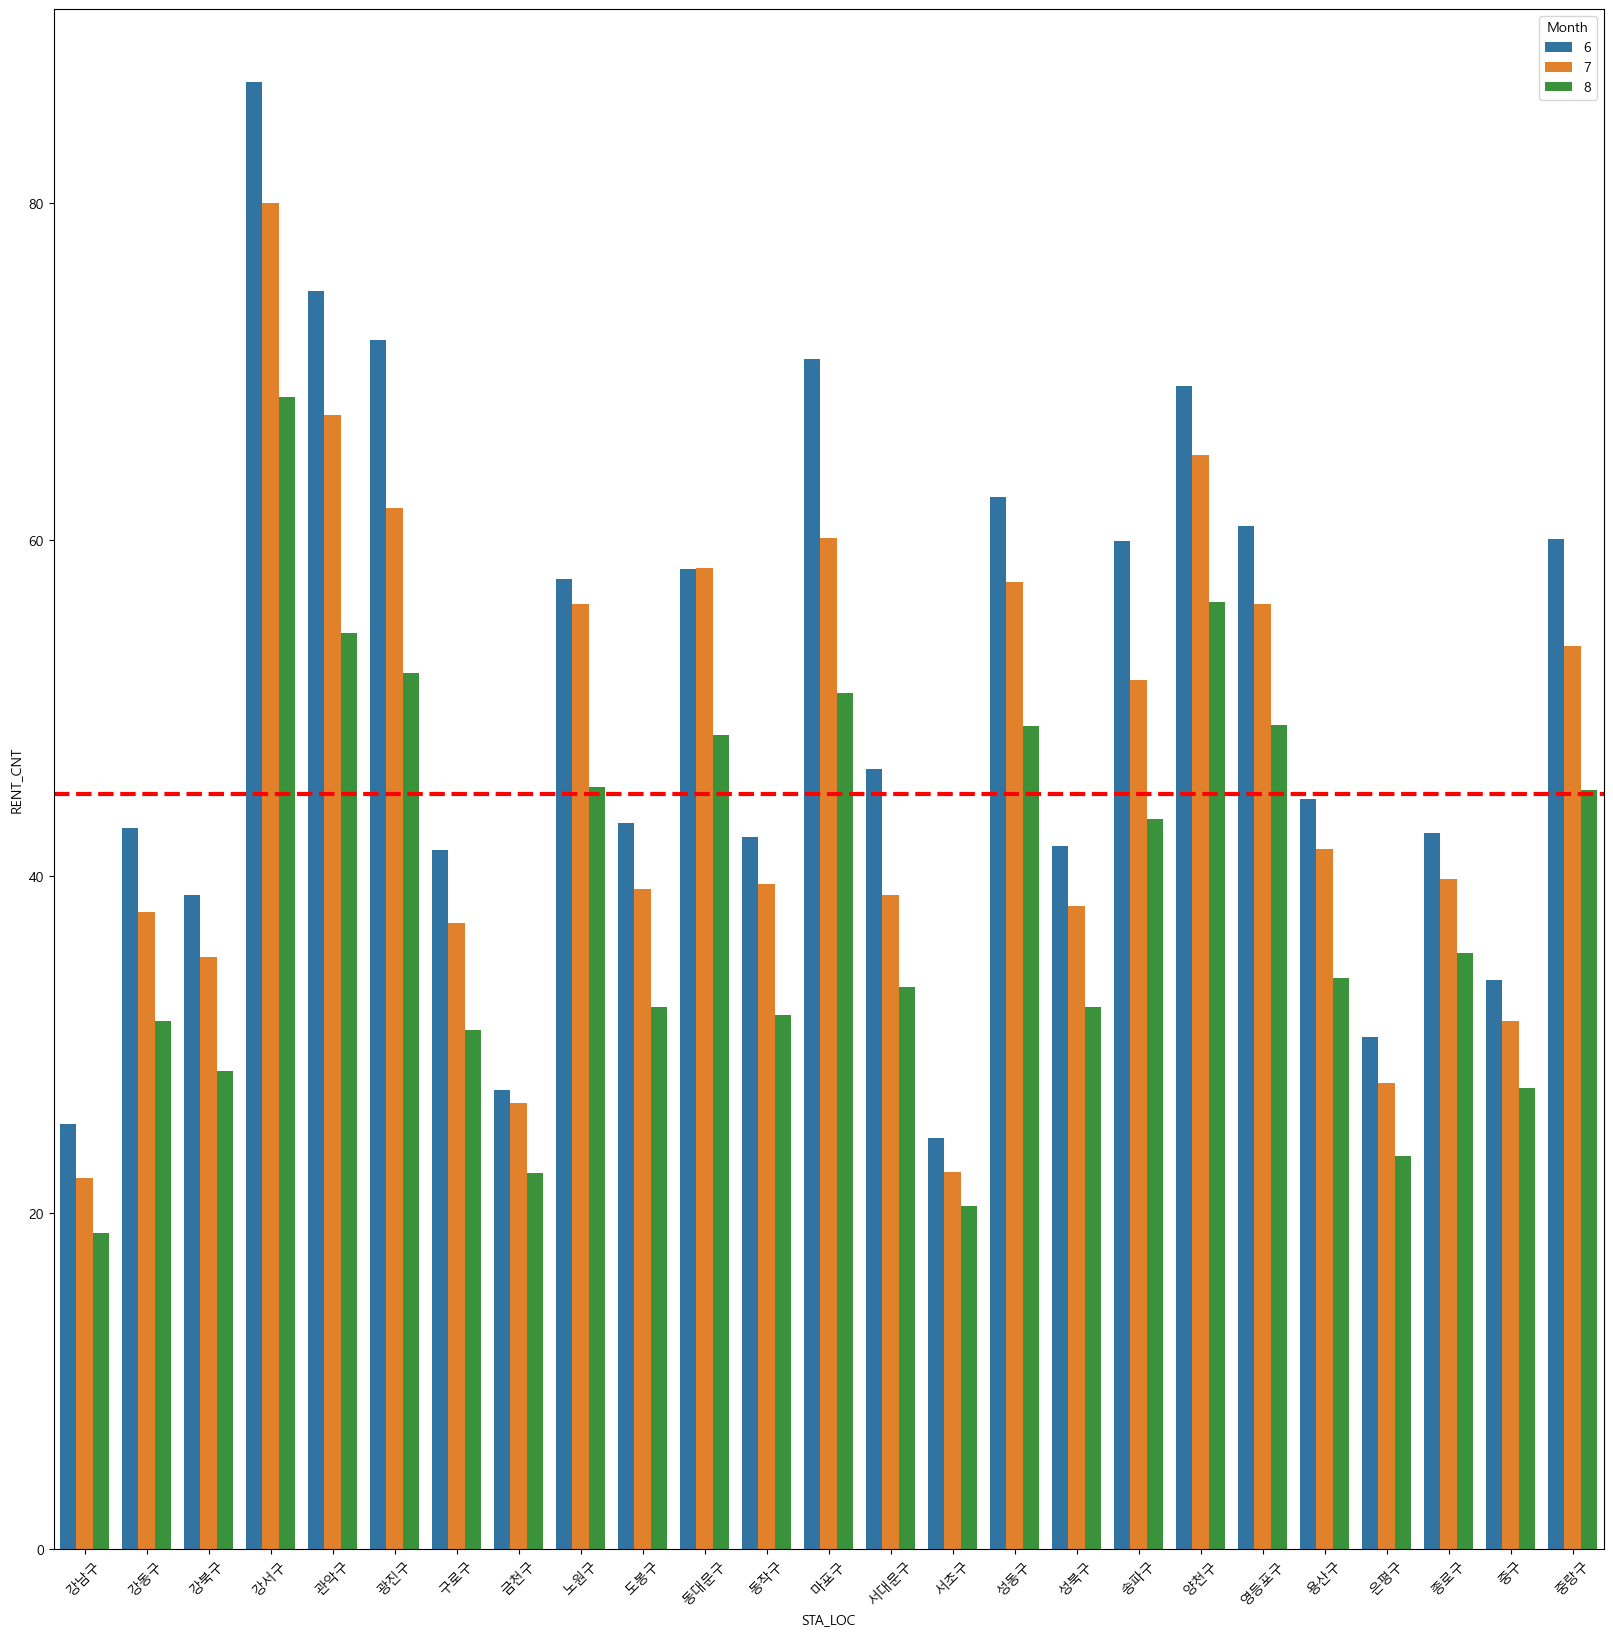

In [139]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=summer_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(summer_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

In [94]:
autumn_use = merged_df[merged_df['Season'] == 3]

In [95]:
sorted_autumn_use = autumn_use.sort_values(by='RENT_CNT', ascending=False)

In [96]:
fall_result = sorted_autumn_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [97]:
fall_result

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Avg_Cloud_level,Avg_Temperature_level,Day_Of_Week
1001699,강서구,2715.마곡나루역 2번 출구,2022-09-29,813,802,20.4,16.4,0612,26.5,1612,,,,,0.00,0.0,5.8,230.0,1744,3.4,250.0,1745,1.4,1227,270.0,14.9,33,1605,73.5,17.0,1004.5,1015.8,2312,1012.7,1540,1014.4,11.9,7.9,1200,2.76,17.37,,,,,,2.5,2.5,21.9,10.0,21.6,21.4,21.2,21.6,22.4,22.9,23.8,21.6,18.7,3.5,4.9,NaN,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도1}090...,,2022,9,29,3.0,0.0,3.0,3
1016678,강서구,2715.마곡나루역 2번 출구,2022-10-14,811,812,17.1,12.4,0529,23.0,1454,,,,,0.00,0.0,5.5,320.0,2047,3.2,290.0,2035,1.6,1415,20.0,11.9,49,1410,73.4,14.0,1009.8,1022.5,0005,1017.6,1829,1019.9,11.3,4.9,1400,2.01,13.52,,,,,,7.9,4.3,17.4,5.6,17.1,16.8,16.8,17.3,18.4,20.2,22.1,21.3,18.9,2.5,3.5,NaN,,,2022,10,14,3.0,2.0,2.0,4
1008689,강서구,2715.마곡나루역 2번 출구,2022-10-06,797,792,15.8,12.7,0640,19.1,1419,0.0,,0.0,,2.25,0.0,6.2,140.0,1255,3.4,50.0,1105,2.1,1842,50.0,11.6,63,1401,76.6,13.6,1008.9,1021.3,0930,1016.6,1707,1019.1,11.6,1.6,1100,1.52,7.74,,,,,,8.9,5.1,17.4,10.0,19.2,19.1,19.4,20.3,21.6,22.2,23.2,21.8,18.8,1.6,2.3,0.0,{비}1635-{비}{강도0}1800-1850.,,2022,10,6,3.0,2.0,2.0,3
1002697,강서구,2715.마곡나루역 2번 출구,2022-09-30,794,793,20.7,14.8,0705,27.7,1522,,,,,0.00,0.0,5.2,250.0,1509,3.2,270.0,1813,1.6,1412,20.0,13.9,34,1618,68.0,16.0,1005.9,1017.2,0741,1013.9,1620,1015.8,11.9,10.6,1200,2.72,19.27,,,,,,0.3,0.0,22.4,7.1,21.5,21.3,21.2,21.6,22.4,22.8,23.7,21.6,18.8,3.8,5.4,NaN,{박무}0620-0755. {연무}1850-2005.,,2022,9,30,3.0,0.0,3.0,4
1009689,강서구,2715.마곡나루역 2번 출구,2022-10-07,789,784,14.3,11.0,0651,18.6,1522,,,,,0.00,0.0,9.2,360.0,1520,4.7,20.0,1525,2.5,2121,290.0,8.6,48,2002,69.5,11.2,1009.9,1023.7,2320,1017.9,0135,1020.2,11.6,7.6,1400,2.07,15.08,,,,,,3.4,2.9,16.8,6.3,18.2,18.2,18.6,19.6,21.1,22.1,23.1,21.7,18.9,2.7,3.8,NaN,,,2022,10,7,3.0,1.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293223,강남구,2395. 개포1단지아파트 입구 (보도육교),2020-10-20,0,1,15.2,9.9,0647,21.7,1413,,,,,0.00,0.0,4.9,290.0,1434,3.1,250.0,1438,1.6,1341,20.0,8.5,38,1658,67.1,11.2,1015.4,1028.8,0903,1022.7,1738,1025.7,11.1,10.0,1200,2.44,15.67,,,,,,0.4,0.0,14.5,3.7,15.9,15.6,16.1,16.8,17.5,19.6,20.9,21.1,18.5,2.9,4.1,NaN,-{박무}-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도0}090...,,2020,10,20,3.0,0.0,2.0,1
699020,종로구,3404.서울특별시 중부교육지원청,2021-11-30,0,1,5.7,0.7,2356,8.9,1334,,,,,13.75,27.2,16.4,290.0,2204,8.4,250.0,1639,3.7,3189,270.0,2.4,60,2400,80.4,7.6,1000.8,1021.1,0003,1005.1,1318,1011.3,9.8,0.0,1300,0.30,0.84,,,,,,9.0,7.8,5.7,0.0,7.3,6.9,7.1,7.8,8.8,11.9,15.1,17.8,18.0,0.9,1.3,10.3,{비}0405-{비}{강도1}0600-{비}{강도0}0900-{비}{강도0}1200...,,2021,11,30,3.0,2.0,1.0,1
250330,종로구,3403.서울특별시 교육청,2020-09-07,0,1,19.2,17.5,0751,20.6,2352,1.9,827,8.4,1933,24.00,61.0,15.3,20.0,1109,7.9,320.0,1059,4.2,3664,50.0,18.0,84,0611,93.5,20.8,983.1,1004.2,0001,984.7,1259,992.8,12.8,0.0,1300,0.90,3.37,,,,,,10.0,6.8,20.1,16.4,21.7,21.6,22.6,23.6,24.9,25.5,25.3,22.0,17.6,1.2,1.7,38.9,-{박무}-0020. {박무}0140-0250. -{비}-{비}{강도0}0300-{...,,2020,9,7,3.0,2.0,2.0,0
977600,도봉구,1748. 방학역 1번출구,2022-09-05,0,2,19.2,17.7,2103,22.7,0001,2.9,1544,12.8,1025,24.00,120.0,18.3,20.0,2226,6.9,50.0,2229,3.2,2729,50.0,18.4,92,0337,95.9,21.3,997.1,1008.7,0019,1004.1,2400,1007.0,12.9,0.0,1200,0.22,1.61,,,,,,10.0,8.3,19.8,16.9,21.9,21.9,22.1,23.1

In [98]:
autumn_day_rent=fall_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [99]:
fall_top_50_rent_loc = autumn_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

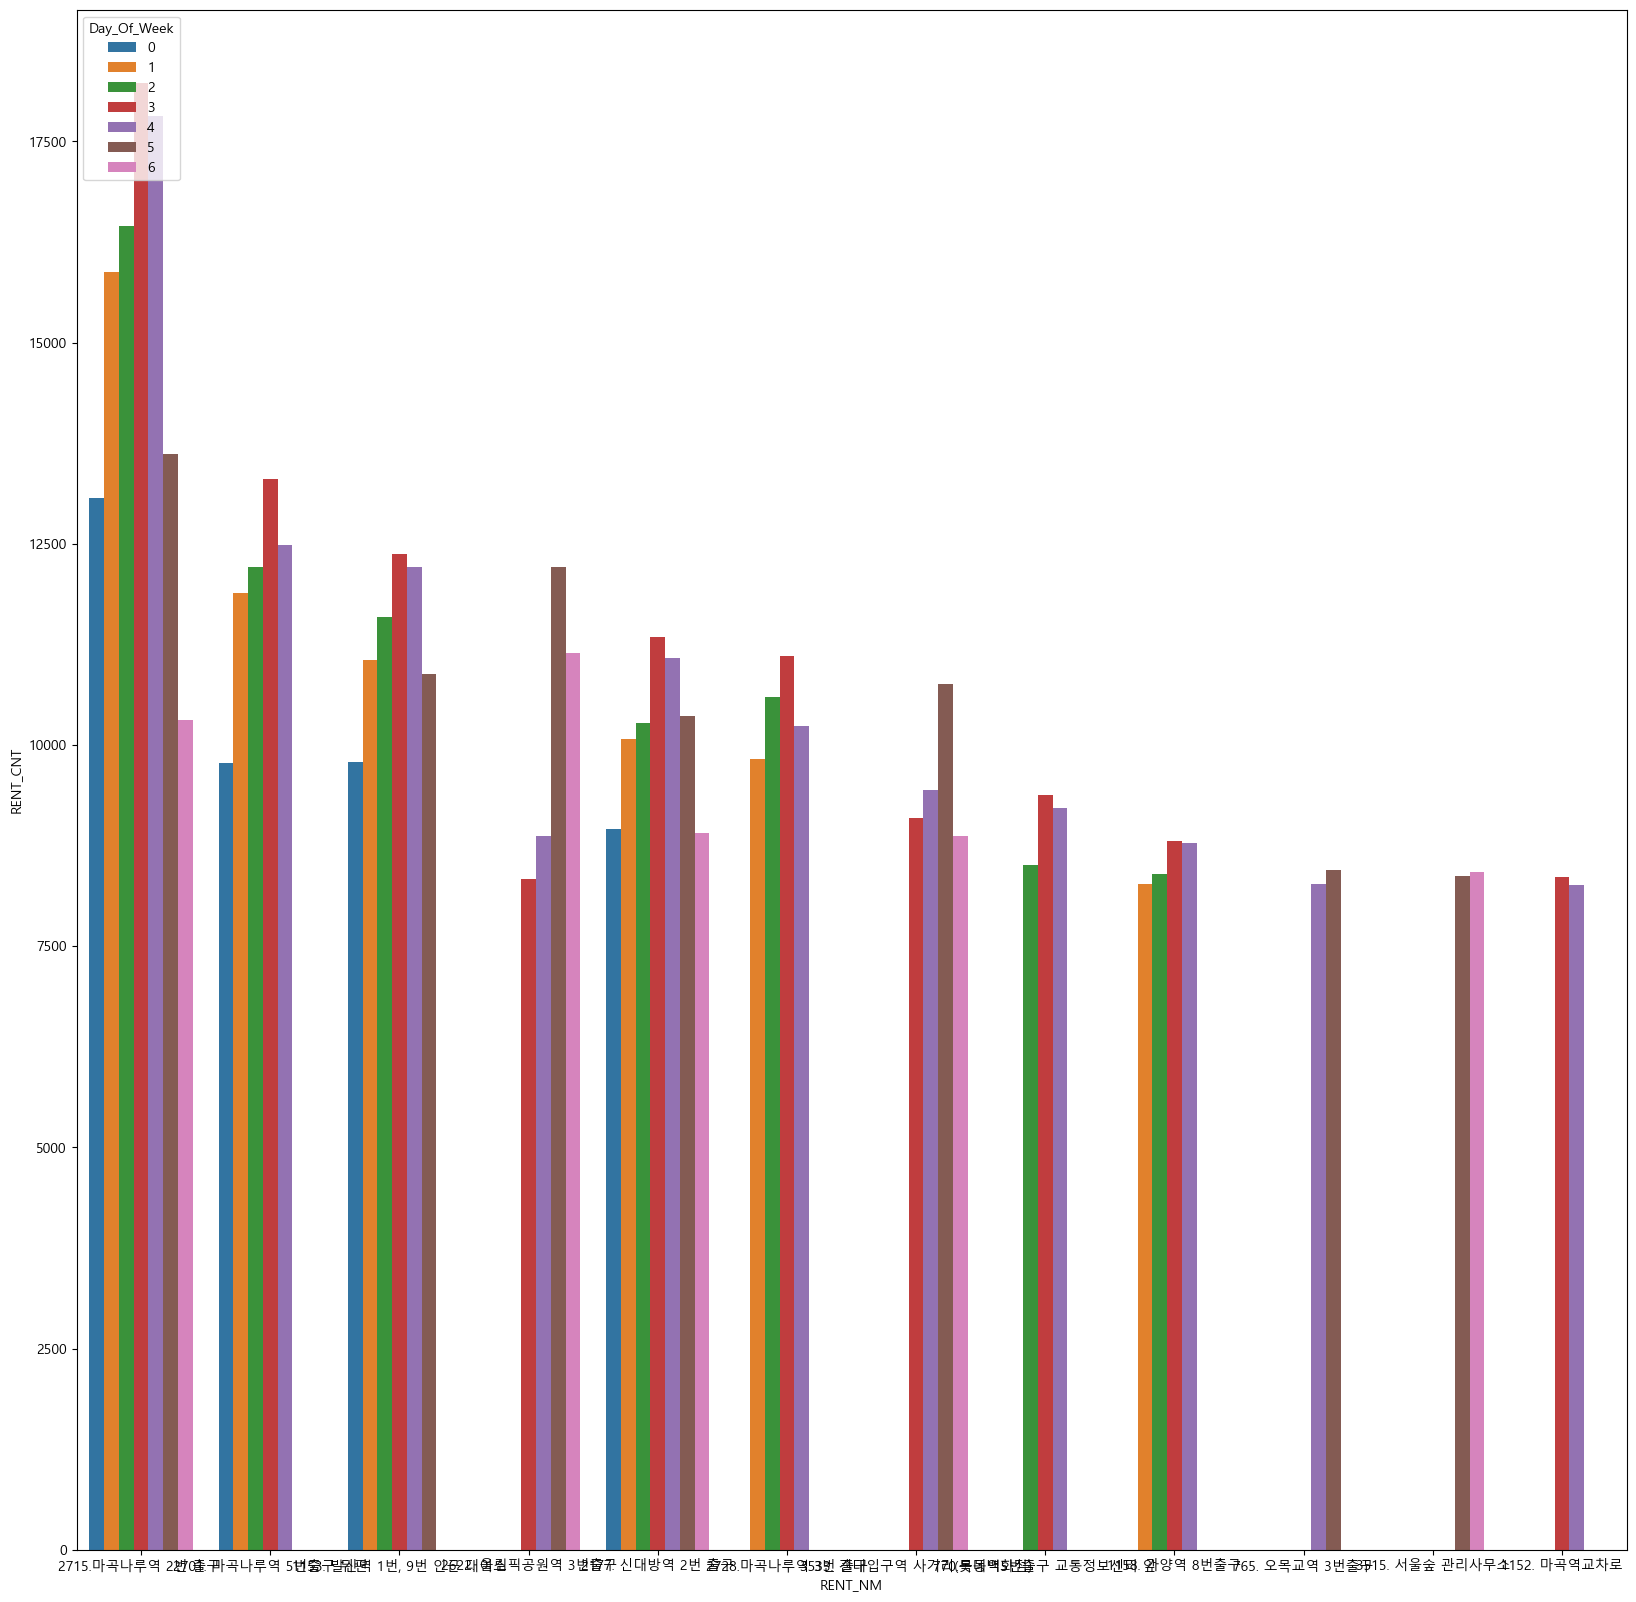

In [100]:
plt.figure(figsize=(20,20))
sns.barplot(data=fall_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 가을 top 50 렌트 횟수
- 마곡나루역에 이용자가 많음

In [101]:
autumn_do_rent=fall_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

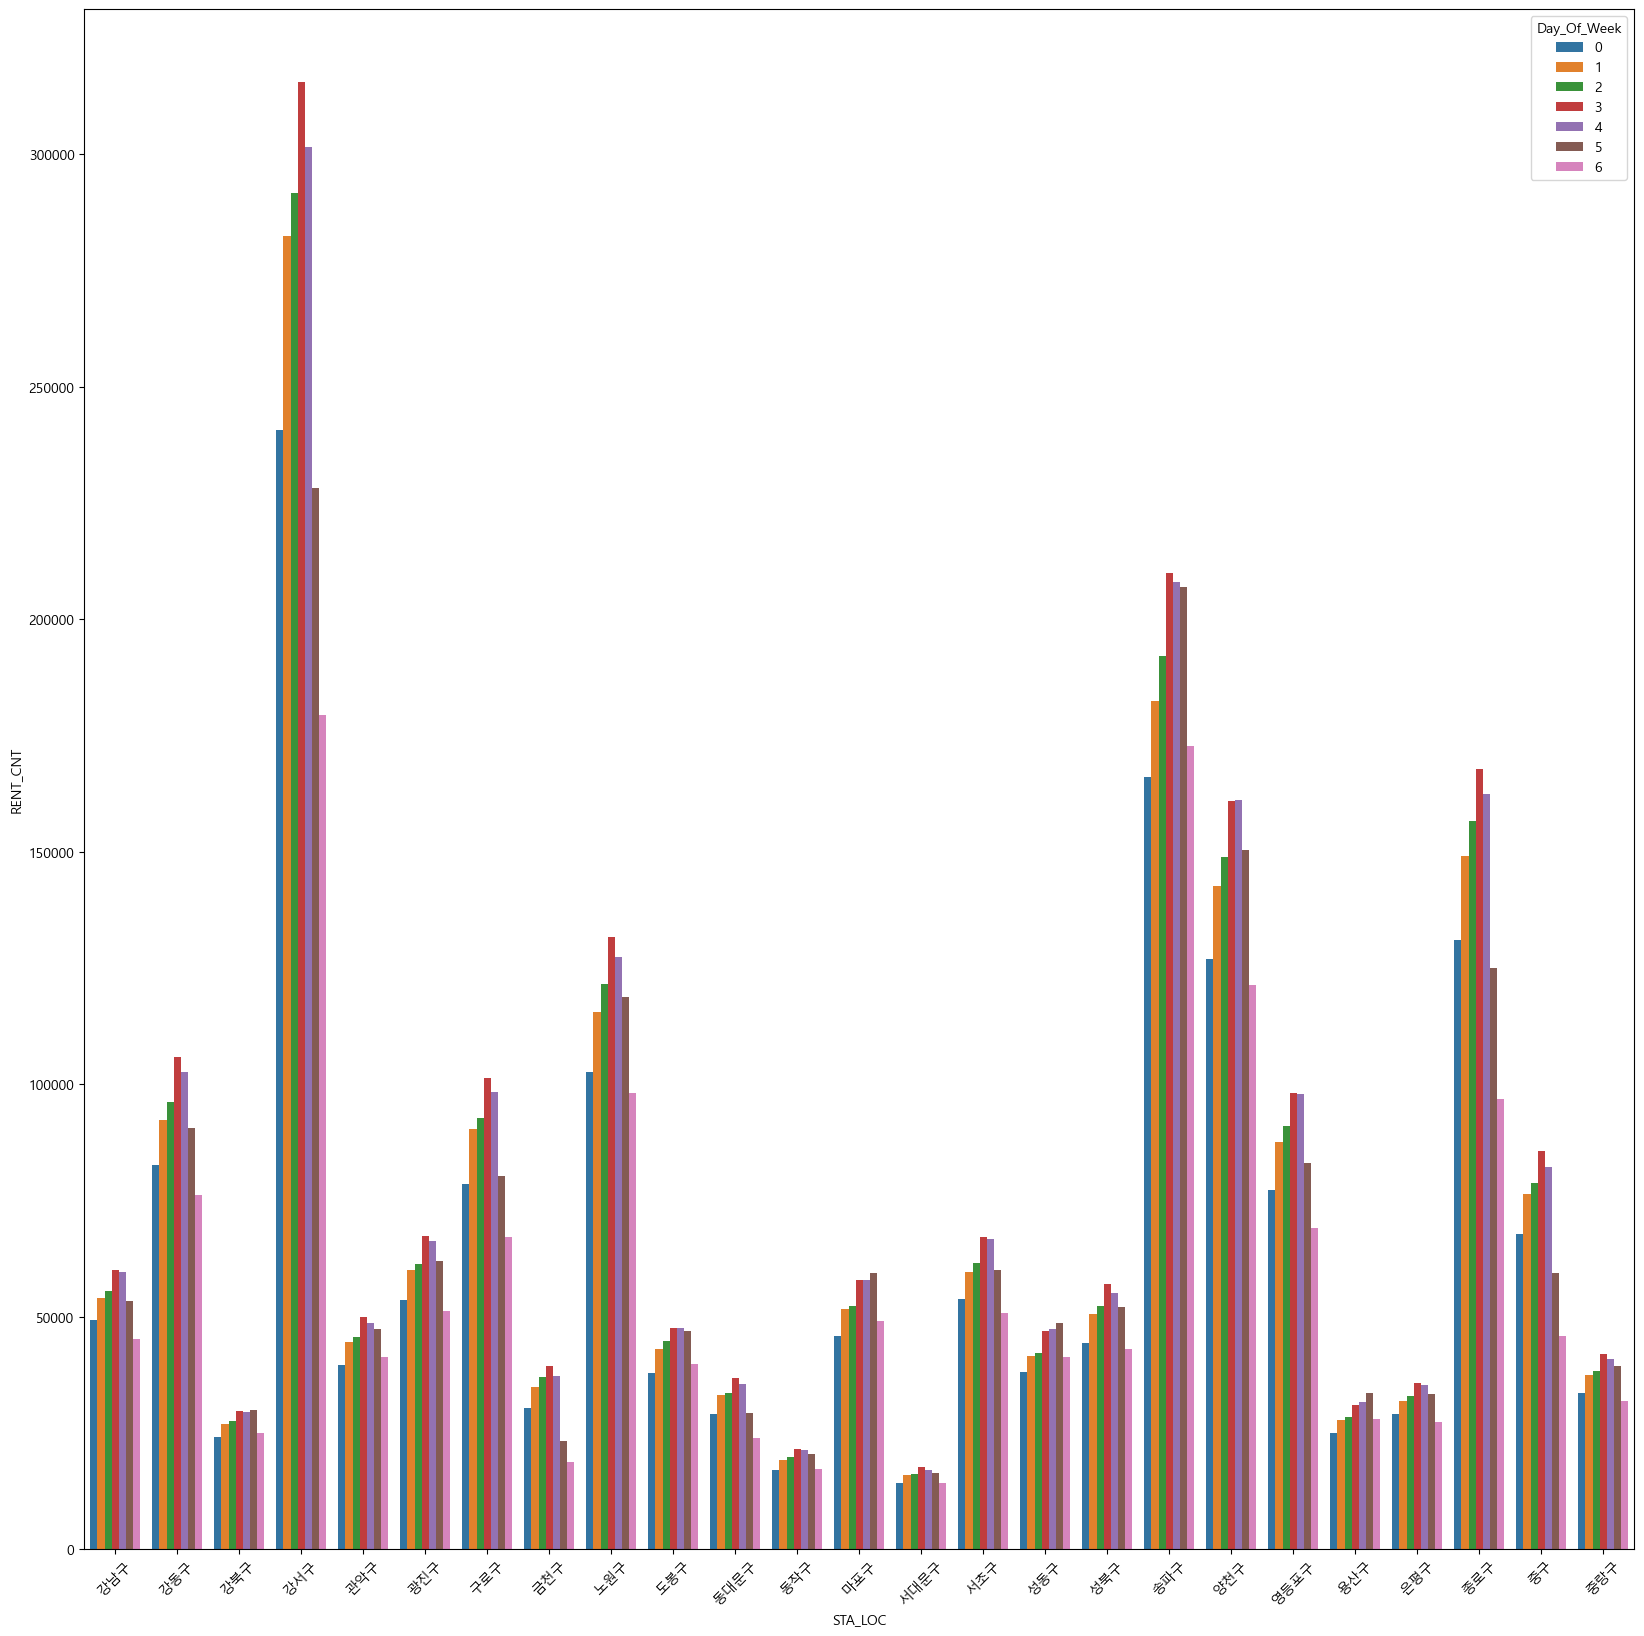

In [102]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=autumn_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')


### 구별 요일별 가을 렌트 횟수
- 목요일 금요일이 다른 요일보다 렌트횟수가 많은 구가 많음

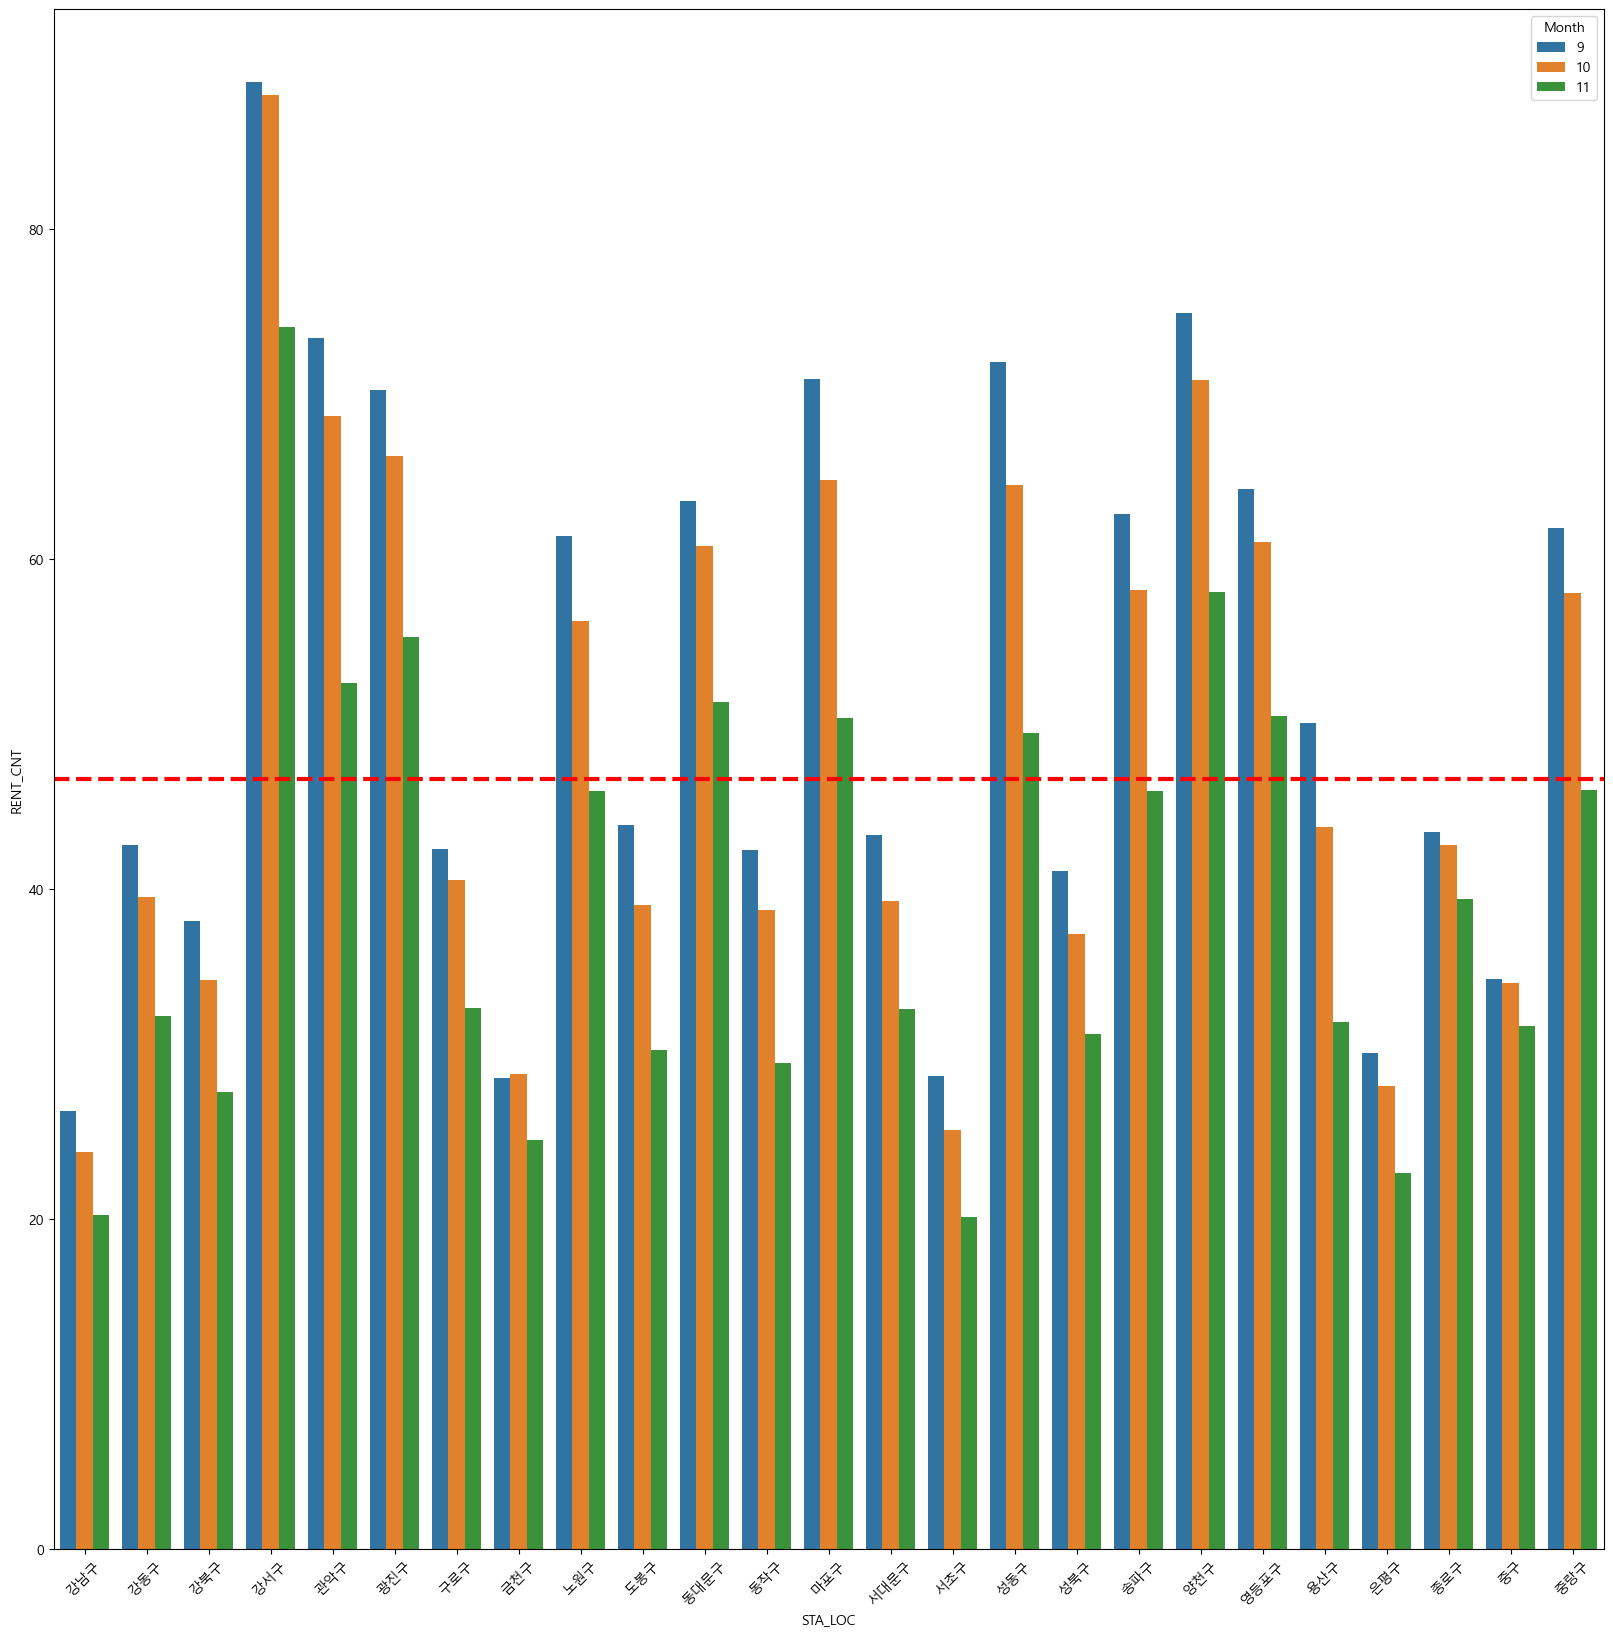

In [140]:
autumn_do_rent_avg=fall_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=autumn_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(autumn_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

In [103]:
winter_use = merged_df[merged_df['Season'] == 4]

In [104]:
sorted_winter_use = winter_use.sort_values(by='RENT_CNT', ascending=False)

In [105]:
winter_result = sorted_winter_use.loc[:, ['STA_LOC','RENT_NM','STAT_DATA','RENT_CNT','RTN_CNT',	'avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','mi10MaxRn','mi10MaxRnHrmt','hr1MaxRn','hr1MaxRnHrmt','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxInsWsHrmt','maxWs','maxWsWd',	'maxWsHrmt','avgWs','hr24SumRws','maxWd','avgTd','minRhm','minRhmHrmt','avgRhm','avgPv','avgPa',	'maxPs','maxPsHrmt','minPs','minPsHrmt','avgPs','ssDur','sumSsHr','hr1MaxIcsrHrmt','hr1MaxIcsr',	'sumGsr','ddMefs','ddMefsHrmt','ddMes','ddMesHrmt','sumDpthFhsc','avgTca','avgLmac','avgTs','minTg','avgCm5Te','avgCm10Te','avgCm20Te','avgCm30Te','avgM05Te','avgM10Te','avgM15Te','avgM30Te',	'avgM50Te','sumLrgEv','sumSmlEv','n99Rn','iscs','sumFogDur','Year','Month','Day','Season'	,'Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']]

In [106]:
winter_day_rent=winter_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [107]:
winter_day_rent=winter_result.groupby(['RENT_NM','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

In [108]:
winter_top_50_rent_loc = winter_day_rent.sort_values(by='RENT_CNT', ascending=False).head(50)

<Axes: xlabel='RENT_NM', ylabel='RENT_CNT'>

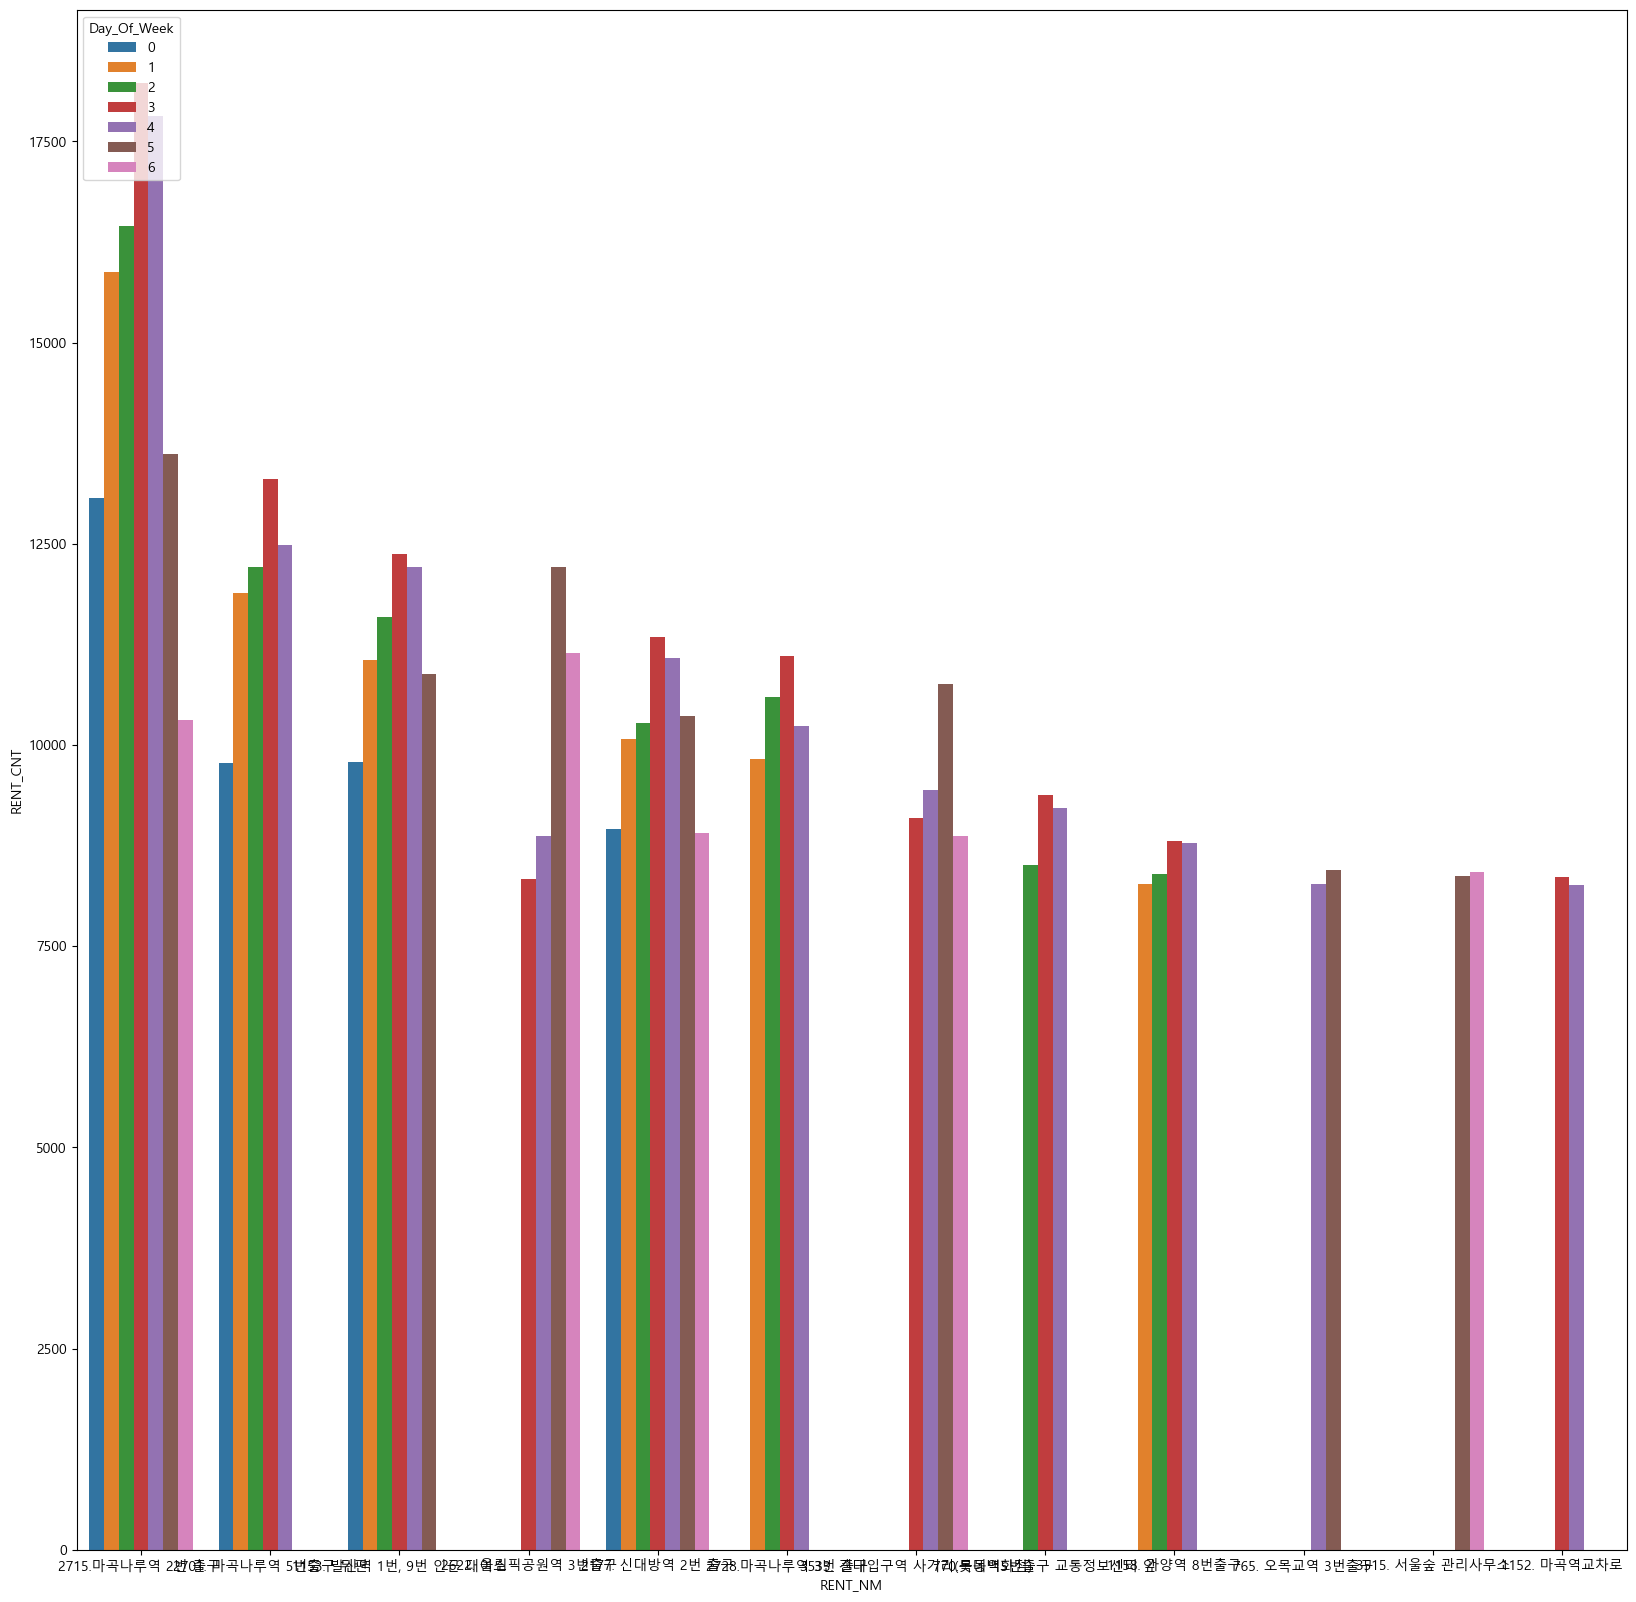

In [109]:
plt.figure(figsize=(20,20))
sns.barplot(data=fall_top_50_rent_loc,x='RENT_NM',y='RENT_CNT',hue='Day_Of_Week')

### 가을 top 50 렌트 횟수
- 마곡나루역에 이용자가 많음

In [110]:
winter_do_rent=winter_result.groupby(['STA_LOC','Day_Of_Week'])['RENT_CNT'].sum().reset_index()

<Axes: xlabel='STA_LOC', ylabel='RENT_CNT'>

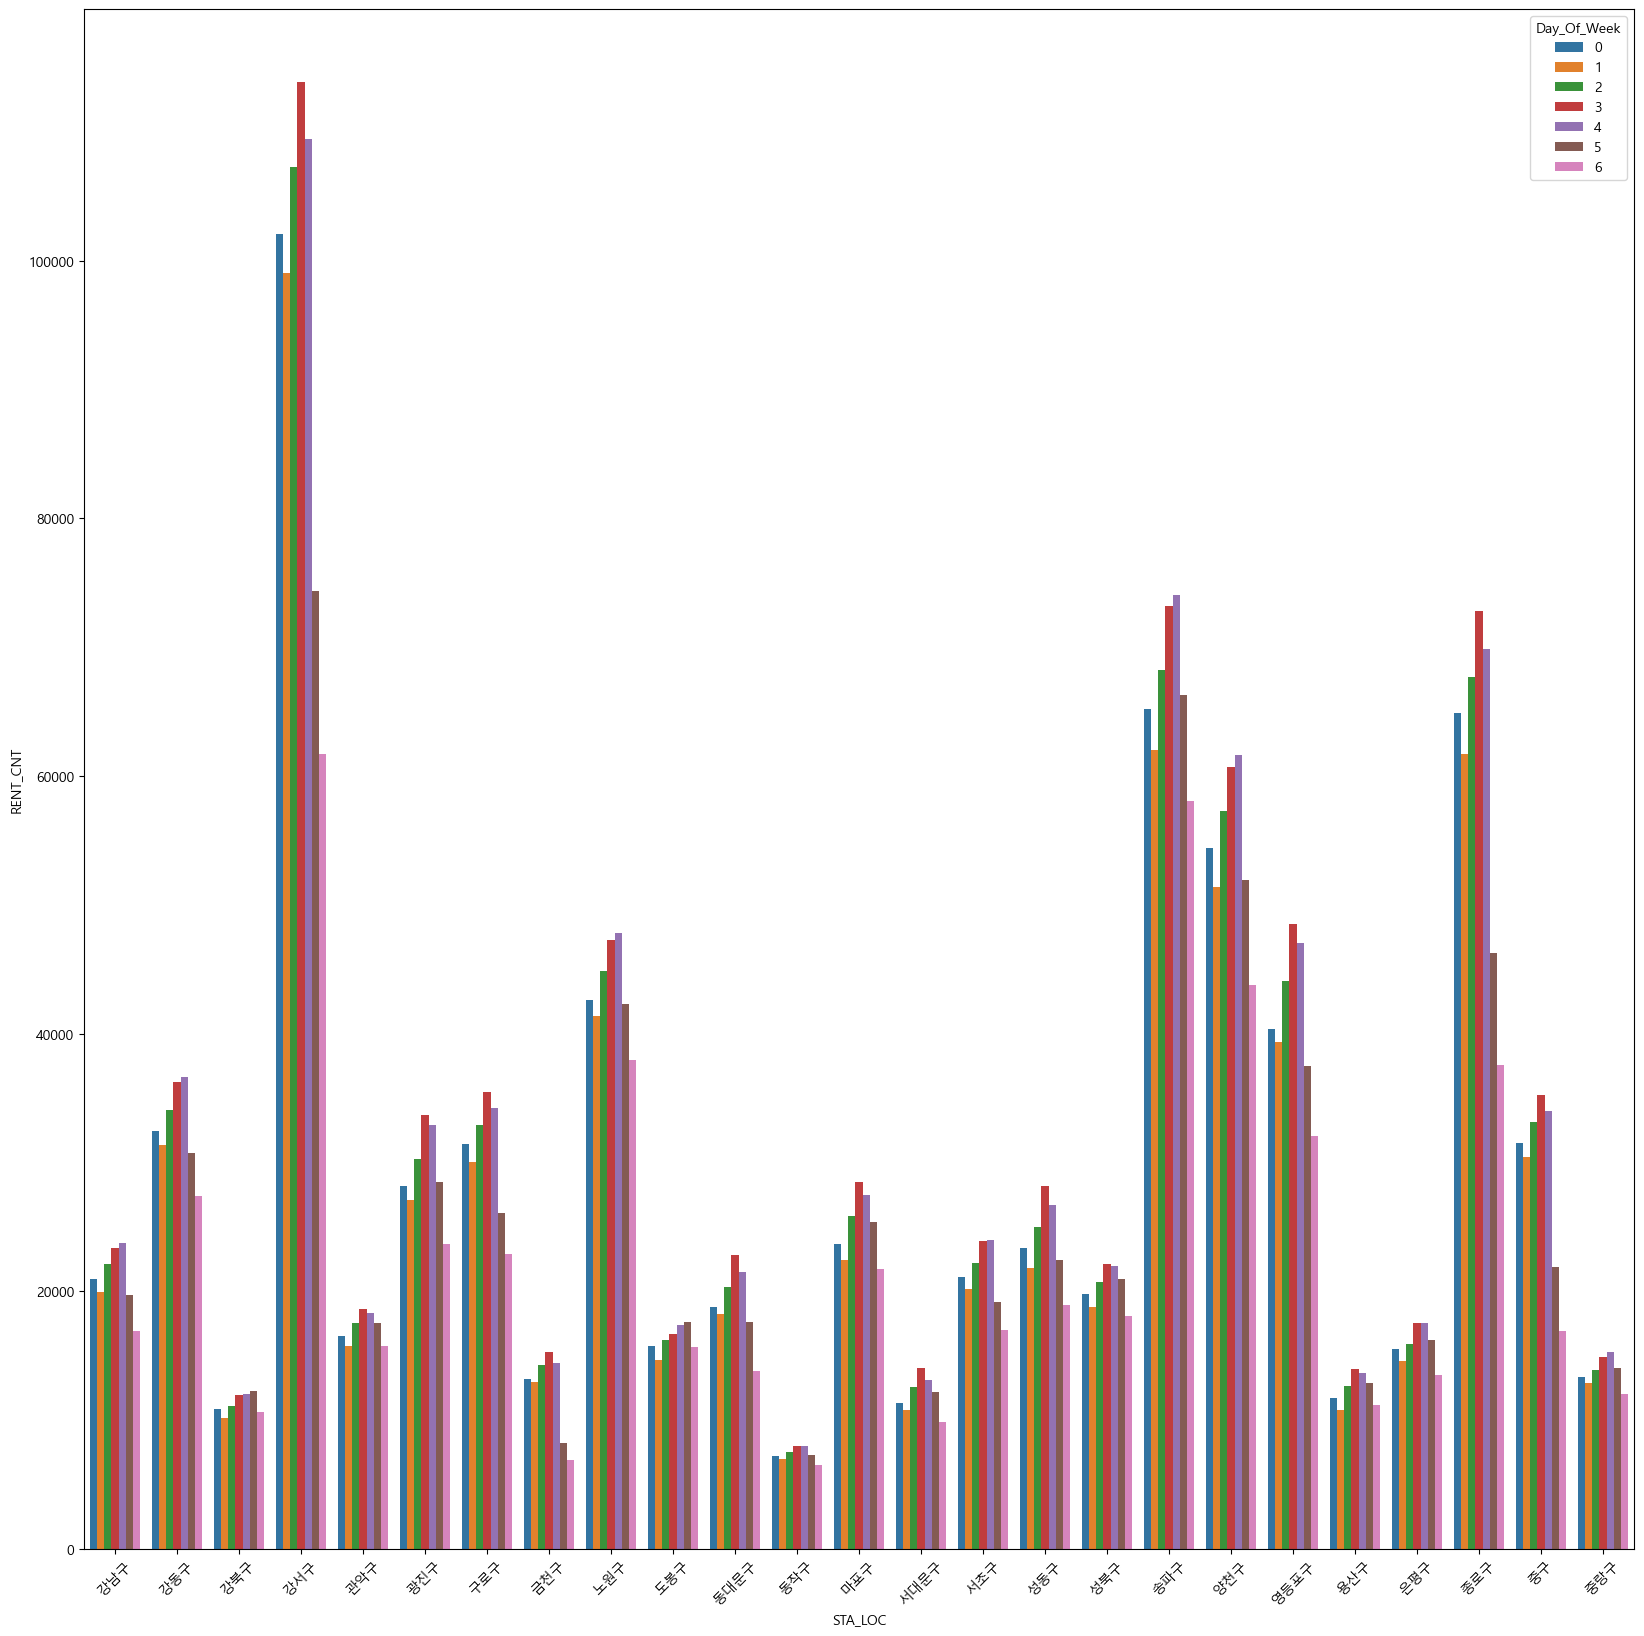

In [111]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=winter_do_rent,x='STA_LOC',y='RENT_CNT',hue='Day_Of_Week')

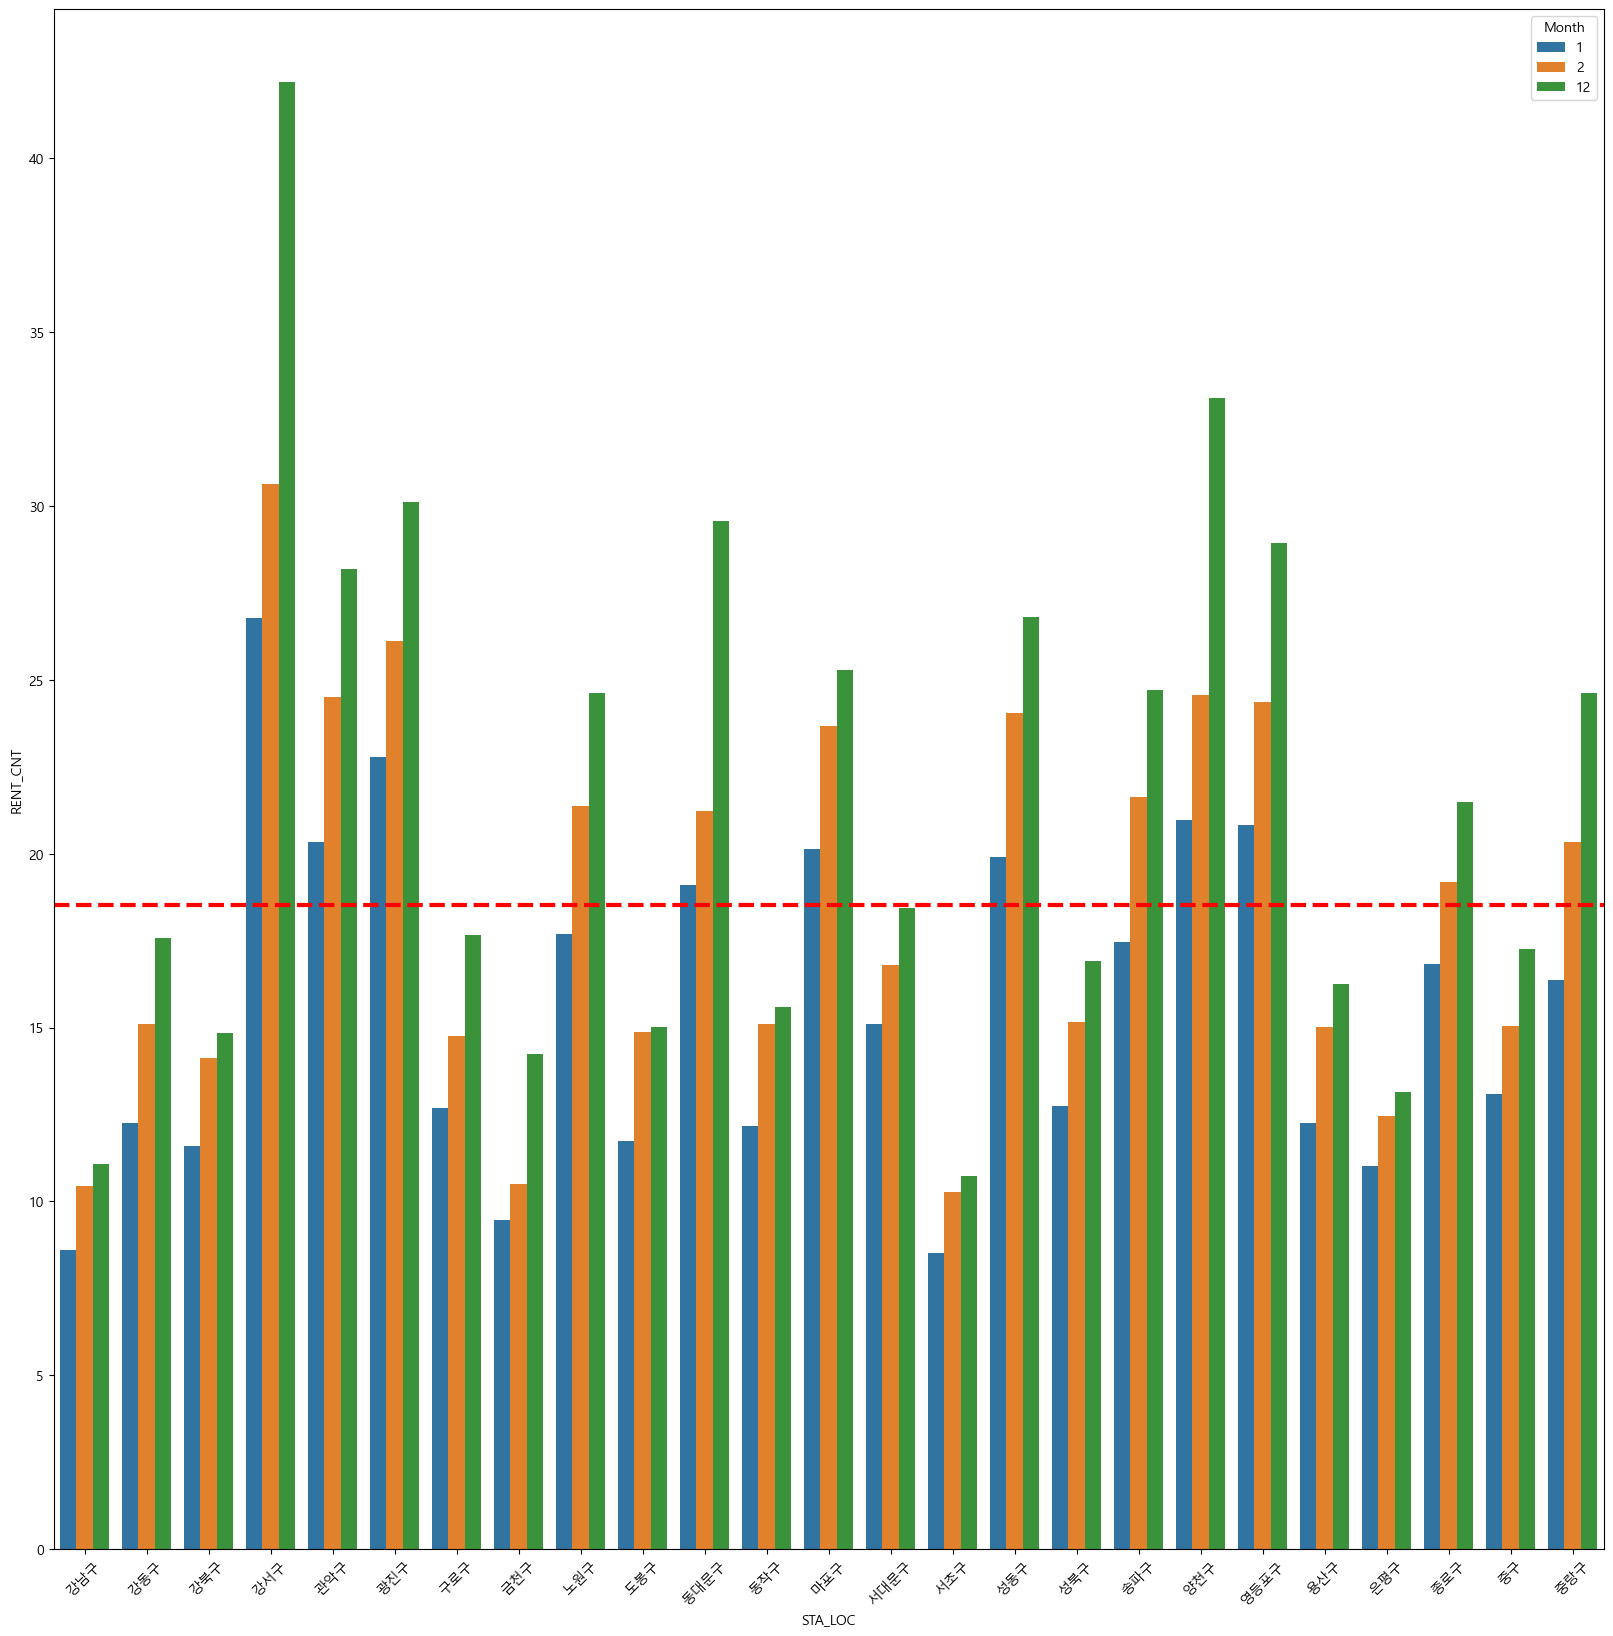

In [141]:
winter_do_rent_avg=winter_result.groupby(['STA_LOC','Month'])['RENT_CNT'].mean().reset_index()
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
sns.barplot(data=winter_do_rent_avg,x='STA_LOC',y='RENT_CNT',hue='Month')
plt.axhline(winter_do_rent_avg['RENT_CNT'].mean(), color='red', linestyle='--', linewidth='3')

### 구별 요일별 겨울 렌트 횟수
- 목요일 금요일이 다른 요일보다 렌트횟수가 많은 구가 많음

### 흥미로운점과 알아낸점
- 봄여름에는 수요일에 이용자가 많고 가을 겨울에는 목금에 이용자가 많은이유
- 봄 여름에는 올림픽공원 자전거 렌트 횟수가 많고 가을 겨울에는 마곡나루역쪽에 이용자가 많음
- 0도에서 20도 사이까지는 맑은 구름이 적은 날씨에 이용자가 많고 날씨가 더운 날에는 구름이 많을때에 렌트횟수가 많음
- 2020-2022까지 꾸준히 성장중
- 구름량이 많은날에 렌트횟수가 비교적 많다
- 이용자가 자전거를 사용했을때 선선하게 느끼게하는 바람일때 이용률이 높다
- 가을 여름 봄 겨울 순으로 이용자가 많다
- 5월달에 이용자가 제일 많다

# 가정
## 공유 자전거 사업을 한다면
- 한강 혹은 한강에 가까이 연결되어있는 천 근처에 사업을 시작한다.(자전거 도로가 잘 되어있는 곳에 이용률이 높다)
- 2020년 부터 2022까지 상승하는 추세로 보아 2023년에는 비슷하거나 더 상승할거라 예측한다
- 자전거 사용률에는 날씨의 영향을 많이 받기 때문에 일기 예보가 중요하다.
- 겨울과 온도가 너무 높을때의 여름에는 이용률이 급격히 떨어지니 이때 괜찮은 자전거를 빌려주고 나머지는 수리 및 체크를 해둔다
- 사람이 선선하게 느끼는 약한 바람과 구름이 있을때에 이용률이 높기때문에 많은 자전거를 준비를 해둔다
- 3월 4월에 한번씩 깜짝이벤트로 할인해서 이용자를 늘리는 방법을 사용한다
- 

In [142]:
dummies_df = pd.get_dummies(merged_df['STA_LOC'], prefix='STA_LOC')

In [143]:
merged_df = pd.concat([merged_df, dummies_df], axis=1)

In [144]:
merged_df

,STA_LOC,RENT_NM,STAT_DATA,RENT_CNT,RTN_CNT,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur,Year,Month,Day,Season,Day_Of_Week,Avg_Cloud_level,Avg_Temperature_level,Avg_Wind_Level,Avg_Humid_Level,STA_LOC_강남구,STA_LOC_강동구,STA_LOC_강북구,STA_LOC_강서구,STA_LOC_관악구,STA_LOC_광진구,STA_LOC_구로구,STA_LOC_금천구,STA_LOC_노원구,STA_LOC_도봉구,STA_LOC_동대문구,STA_LOC_동작구,STA_LOC_마포구,STA_LOC_서대문구,STA_LOC_서초구,STA_LOC_성동구,STA_LOC_성북구,STA_LOC_송파구,STA_LOC_양천구,STA_LOC_영등포구,STA_LOC_용산구,STA_LOC_은평구,STA_LOC_종로구,STA_LOC_중구,STA_LOC_중랑구
0,양천구,729. 서부식자재마트 건너편,2020-01-01,16,12,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0,약함,보통,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,양천구,731. 서울시 도로환경관리센터,2020-01-01,20,20,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0,약함,보통,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,양천구,732. 신월중학교,2020-01-01,9,2,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0,약함,보통,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,양천구,733. 신정이펜하우스314동,2020-01-01,6,4,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0,약함,보통,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,양천구,734. 신트리공원 입구,2020-01-01,13,16,-2.2,-6.5,0001,0.3,1457,,,,,9.83,0.1,4.8,50.0,0906,2.6,50.0,0904,0.6,509,50.0,-8.1,37,0002,64.4,3.4,1021.1,1034.0,0952,1031.2,1418,1032.1,9.6,0.8,1100,1.0,4.53,0.0,,0.0,,0.0,8.9,8.9,-0.9,-6.6,-0.4,0.5,1.9,2.9,4.1,7.2,9.8,15.3,17.0,0.4,0.6,0.1,-{눈}-0230. {눈}0335-0440. {눈}0520-{눈}{강도0}0600-...,,2020,1,1,4.0,2,2.0,0.0,약함,보통,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093657,마포구,154. 마포구청역,2022-12-30,43,50,-1.8,-4.4,2355,2.3,1354,,,,,2.58,0.0,7.5,270.0,1519,4.6,270.0,15

In [145]:
# LabelEncoder 객체 생성
encoder = LabelEncoder()

In [146]:
# 특정 컬럼에 레이블 인코딩 적용
merged_df['RENT_LOC'] = encoder.fit_transform(merged_df['RENT_NM'])

In [147]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093662 entries, 0 to 1093661
Data columns (total 99 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   STA_LOC                1093662 non-null  object        
 1   RENT_NM                1093662 non-null  object        
 2   STAT_DATA              1093662 non-null  datetime64[ns]
 3   RENT_CNT               1093662 non-null  int32         
 4   RTN_CNT                1093662 non-null  object        
 5   avgTa                  1093662 non-null  float64       
 6   minTa                  1092663 non-null  float64       
 7   minTaHrmt              1093662 non-null  object        
 8   maxTa                  1093662 non-null  float64       
 9   maxTaHrmt              1093662 non-null  object        
 10  mi10MaxRn              1093662 non-null  object        
 11  mi10MaxRnHrmt          1093662 non-null  object        
 12  hr1MaxRn               10936

In [159]:
select_col = ['STA_LOC_강남구','STA_LOC_강동구','STA_LOC_강북구','STA_LOC_강서구','STA_LOC_관악구',	'STA_LOC_광진구','STA_LOC_구로구','STA_LOC_금천구','STA_LOC_노원구','STA_LOC_도봉구','STA_LOC_동대문구','STA_LOC_동작구','STA_LOC_마포구','STA_LOC_서대문구','STA_LOC_서초구',	'STA_LOC_성동구','STA_LOC_성북구','STA_LOC_송파구','STA_LOC_양천구','STA_LOC_영등포구',	'STA_LOC_용산구','STA_LOC_은평구','STA_LOC_종로구','STA_LOC_중구','STA_LOC_중랑구','RENT_LOC','avgTa','maxTa','sumRnDur','sumRn','maxInsWs','maxInsWsWd','maxWs','maxWsWd','avgWs','maxWd','avgTd','avgRhm','avgPv','ssDur','avgTca','avgLmac','avgTs','avgM50Te','Year','Month','Day','Season','Avg_Cloud_level','Avg_Temperature_level','Day_Of_Week']
X = merged_df[select_col]
y = merged_df['RENT_CNT']


In [160]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [161]:
merged_df['minRhm'] = merged_df['minRhm'].astype(int)

In [162]:
# 각 열의 결측치 개수 확인
X.loc[X.isnull().any(axis=1)]

,STA_LOC_강남구,STA_LOC_강동구,STA_LOC_강북구,STA_LOC_강서구,STA_LOC_관악구,STA_LOC_광진구,STA_LOC_구로구,STA_LOC_금천구,STA_LOC_노원구,STA_LOC_도봉구,STA_LOC_동대문구,STA_LOC_동작구,STA_LOC_마포구,STA_LOC_서대문구,STA_LOC_서초구,STA_LOC_성동구,STA_LOC_성북구,STA_LOC_송파구,STA_LOC_양천구,STA_LOC_영등포구,STA_LOC_용산구,STA_LOC_은평구,STA_LOC_종로구,STA_LOC_중구,STA_LOC_중랑구,RENT_LOC,avgTa,maxTa,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxWs,maxWsWd,avgWs,maxWd,avgTd,avgRhm,avgPv,ssDur,avgTca,avgLmac,avgTs,avgM50Te,Year,Month,Day,Season,Avg_Cloud_level,Avg_Temperature_level,Day_Of_Week


In [163]:
scaler = StandardScaler()

In [164]:
scaled_features = scaler.fit_transform(X)

In [ ]:
X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [ ]:
random_forest_all_col = RandomForestRegressor()

In [ ]:
random_forest_all_col.fit(X_train_ran, y_train_ran)

RandomForestRegressor()

In [ ]:
y_pred_ran = random_forest_all_col.predict(X_test_ran)
mse = mean_squared_error(y_test_ran, y_pred_ran)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 149.5287131905108


In [ ]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [154]:
xgboost_all_col = XGBRegressor()

In [ ]:
xgboost_all_col.fit(X_train_xg, y_train_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xg = xgboost_all_col.predict(X_test_xg)
rmse = mean_squared_error(y_test_xg, y_pred_xg)
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 406.0620954635358


In [ ]:
ridge_all_col=Ridge()

In [ ]:
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [ ]:
ridge_all_col.fit(X_train_ridge, y_train_ridge)

Ridge()

In [ ]:
y_pred_ridge = ridge_all_col.predict(X_test_ridge)
rmse = mean_squared_error(y_test_ridge, y_pred_ridge)
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 1302.8260649820124


In [110]:
lgbm_all_col=LGBMRegressor()

In [ ]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [ ]:
lgbm_all_col.fit(X_train_lgbm, y_train_lgbm)

LGBMRegressor()

In [ ]:
y_pred_lgbm = lgbm_all_col.predict(X_test_lgbm)
rmse = mean_squared_error(y_test_ridge, y_pred_lgbm)
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 948.2527267402019


In [103]:
select_col2 = ['STA_LOC_강남구','STA_LOC_강동구','STA_LOC_강북구','STA_LOC_강서구','STA_LOC_관악구',	'STA_LOC_광진구','STA_LOC_구로구','STA_LOC_금천구','STA_LOC_노원구','STA_LOC_도봉구','STA_LOC_동대문구','STA_LOC_동작구','STA_LOC_마포구','STA_LOC_서대문구','STA_LOC_서초구',	'STA_LOC_성동구','STA_LOC_성북구','STA_LOC_송파구','STA_LOC_양천구','STA_LOC_영등포구',	'STA_LOC_용산구','STA_LOC_은평구','STA_LOC_종로구','STA_LOC_중구','STA_LOC_중랑구','RENT_LOC','avgTa','maxTa','sumRn','avgWs','avgRhm','avgPv','avgTca','avgLmac','avgTs','avgM50Te','Year','Month','Day','Day_Of_Week']
X = merged_df[select_col2]
y = merged_df['RENT_CNT']

In [104]:
scaler_selec = StandardScaler()

In [105]:
scaled_features = scaler_selec.fit_transform(X)

In [107]:
X_train_ran_1, X_test_ran_1, y_train_ran_1, y_test_ran_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [108]:
random_forest_select_col = RandomForestRegressor()

In [109]:
random_forest_select_col.fit(X_train_ran_1, y_train_ran_1)

RandomForestRegressor()

In [110]:
y_pred_ran_1 = random_forest_select_col.predict(X_test_ran_1)
mse = mean_squared_error(y_test_ran_1, y_pred_ran_1)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 164.27786307187299


In [111]:
xgboost_selec_col = XGBRegressor()

In [112]:
X_train_xg_1, X_test_xg_1, y_train_xg_1, y_test_xg_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [113]:
xgboost_selec_col.fit(X_train_xg_1, y_train_xg_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
y_pred_xg_1 = xgboost_selec_col.predict(X_test_xg_1)
rmse1 = mean_squared_error(y_test_xg_1, y_pred_xg_1)
print(f"Mean Squared Error: {rmse1}")

Mean Squared Error: 401.602644228866


In [115]:
ridge_selec_col=Ridge()

In [116]:
X_train_ridge_1, X_test_ridge_1, y_train_ridge_1, y_test_ridge_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [117]:
ridge_selec_col.fit(X_train_ridge_1, y_train_ridge_1)

Ridge()

In [118]:
y_pred_ridge_1 = ridge_selec_col.predict(X_test_ridge_1)
rmse2 = mean_squared_error(y_test_ridge_1, y_pred_ridge_1)
print(f"Mean Squared Error: {rmse2}")

Mean Squared Error: 1319.0121754996821


In [106]:
lgbm_selec_col=LGBMRegressor()

In [120]:
X_train_lgbm_1, X_test_lgbm_1, y_train_lgbm_1, y_test_lgbm_1 = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [121]:
lgbm_selec_col.fit(X_train_lgbm_1, y_train_lgbm_1)

LGBMRegressor()

In [122]:
y_pred_lgbm_1 = lgbm_selec_col.predict(X_test_lgbm_1)
rmse3 = mean_squared_error(y_test_lgbm_1, y_pred_lgbm_1)
print(f"Mean Squared Error: {rmse3}")

Mean Squared Error: 951.7941426376892


In [155]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [165]:
mse_scores = cross_val_score(xgboost_all_col, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [166]:
# 각 fold의 MSE 출력
for i, score in enumerate(mse_scores, 1):
    print(f"Fold {i} MSE: {score}")

Fold 1 MSE: -410.31280257955007
Fold 2 MSE: -390.18143196462535
Fold 3 MSE: -402.5893775342202
Fold 4 MSE: -416.4991575607072
Fold 5 MSE: -399.5337155389564
Fold 6 MSE: -388.5725276921135
Fold 7 MSE: -408.59563184158736
Fold 8 MSE: -408.7615566069615
Fold 9 MSE: -416.86026815220436
Fold 10 MSE: -406.3030010843183


In [167]:
print(f"평균 MSE: {np.mean(mse_scores)}")

평균 MSE: -404.8209470555244
